#Early stage diabetes risk prediction dataset


**Data**

https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.

provided from: M. M. Faniqul Islam, Rahatara Ferdousi, Sadikur Rahman and Humayra Yasmin Bushra

This has been collected using direct questionnaires from the patients of Sylhet Diabetes
Hospital in Sylhet, Bangladesh and approved by a doctor.

**Jupyter Notebook**

Moritz Kopp

moritz-kopp@gmx.de

Project was created as term project for the DDE1 lecture in WS20/21.

My english ingredient may be a bit moldy. But i hope it wont ruin the whole dish. :D If you got questions please write me an email.

I added some pictures in the notebook, i hope they will also show up in your version.


# Analysis of the Problem



##Problem description

My problem is about the widespread disease diabetes.
Diabtes is a fast growing disease. The number of people worldwide with diabetes rose in the last 34 years by 290% ( from 108mio. to 422mio.) [1].
In 2016 around 1.6mio. deaths were related to diabetes. [1]
Often the disease has a high prevelance in low and mid -income countries.
Once Diabetes is detected early, its quiet easy to treat the syptoms and reduce the chance of early mortality.
But around 50% of all people with Diabetes are undiagnosed. [2]
Especially in countries with low medical care, where most of the people cant afford medical examinations or are to afraid to go to the doctor.
Therfore would be an easy online Tool great that is accesible for everyone, where you can enter your syptoms and the tool would tell you if you probably have Diabetes or not.
But important is, that it is only a advice and not a diagnoses, so it should only help you to decide if you go to the docotor or not.

The Problem is a static binary classification. The data is also mostly binary data except the age. The count of data samples is with 520 relativley low. So it is not possible to train here for real use. And also the data is only collected at one spot in Bangladesh.For a worldwide tool it would be necassary to collect more samplels from around the world. But this data could be perfectly used as baseline study.

###Working Hypthohesis:
Build a feasibillty studie with the data if it is possible to correctly classify diabetes with machine Learning with the input of syptoms as features. And which machine learning model delivers the best output with the best score.




##Choosing a Measure of Success:

In my opinion its very imoportant to detect everybody that has diabetes and uses the tool(reduce False Negative classification). It would be bad if someone has diabetes and the tool recommends him not to go to the docotor.  So i would say that the Recall value is the most important measure of success. But nevertheless Precision is also important , so that not to many people get diagnosed with Diabetis(false Positive). Therefore i would say that Recall-Precission should be weighted. For this case there is the Fbeta score (beta is the weight for precision to recall). Later in the notebook i will introduce that score more accurate. The aim is to maximize the Fbeta score with every model.



##Evaluation protocol
To understand the evaluation steps better orient yourself on the graph below. The orginal data is splitted into 80% Training data and 20% Test data. To optimize the training we use the k fold cross validation and split the data into 5 more parts. With the help of the training score and the crossvalidation score, we could evaluate the perfomance of the model in training. We can get a indication if the model is already overfitted or is still underfitted. The Training and CV- Score is also calculated with the fbeta score. After we completed the training with the crossvalidation, we will calculate the fbeta score of the trained classifier. Therefore we use the Training data to get F_ScoreTraining and use the splited Test data to get F_ScoreTest. The important score that shows the perfomance of the classifier is the F_ScoreTest. After the normal training we try to optimize the models from the first chapter with the help of GridSearch and calculate with the GridSearched optimized model the F_ScoreTestGS.


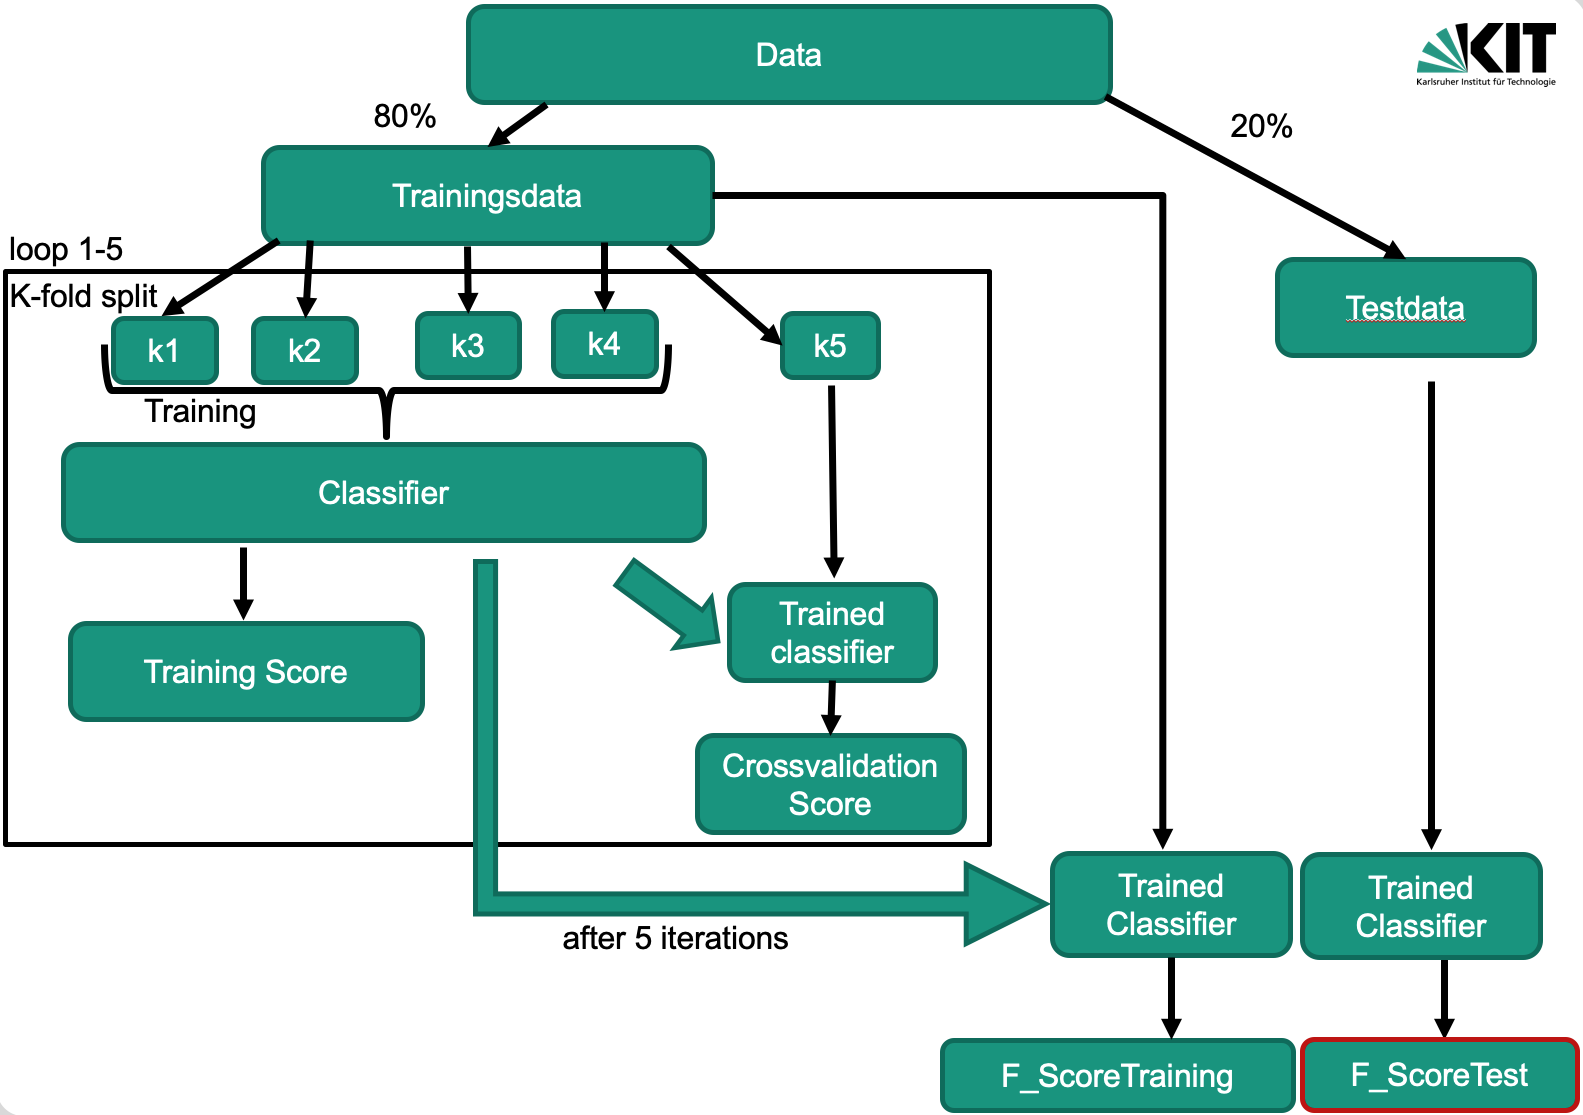



1 = https://www.who.int/news-room/fact-sheets/detail/diabetes

2 = Computer Vision and Machine Intelligence in Medical Image Analysis - Likelihood Prediction of Diabetes at Early Stage Using Data Mining Techniques - M.M. Faniqul Islam et. al.


# Data Exploration and Preparation

## Preparing the enviroment


In [412]:
import numpy as np
np.random.seed(2021)
import pandas as pd
import os
os.environ['PYTHONHASHSEED'] = '0'
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pp
from sklearn.svm import SVR
from sklearn.svm import SVC #binary classifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA

import graphviz

import random as rn
rn.seed(2021)

import tensorflow as tf
tf.random.set_seed(2021)

import seaborn as sns

import plotly.express as px

from tensorflow.keras.metrics import Metric
from tensorflow import keras
from keras import optimizers, models, layers, regularizers

# Loading the data
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

##Loading data

In [413]:
downloaded = drive.CreateFile({'id':'1rWY_2mGgI1U6wnT20Hw19Upm1KTUlmCB'}) 
downloaded.GetContentFile('diabetes_data_upload.csv')
data = pd.read_csv('diabetes_data_upload.csv')

The Interface to the complete noetbook is the pandas datframe with the loaded data. If you have to change the data import, please use as imported variablename 'data'.

## Data exploration

Getting the first overview of the data. The data consists out of 520 samples and 16 features. The last column is the class label. Positiv means the person has Diabetes. There are no Missing Values.

In [414]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [415]:
data.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


Plotting 16 features in a pie plot to detect imbalance in the binary data.
The only Numerical feature 'Age' is plotted in a Histogram.

In the following short explanations to the features 
* Gender : self-explanatory
* Polyuria: is excessive or an abnormally large production or passage of urine
* Polydipsia: is excessive thirst or excess drinking
* sudden weight loss: self-explanatory
* weakness : self-explanatory
* Polyphagia :is an abnormally strong sensation of hunger
* Genetial thrush:  fungal infection on genitals
* visual blurring: self-explanatory
* itching: self-explanatory
* irritability: self-explanatory
* delayed healing: self-explanatory
* partial paresis: a weakness of voluntary movement,
* muscle stiffness: self-explanatory
* Alopecia: Hair loss
* Obesity:  body fat has accumulated to an extent that it may have a negative effect on health 
* Age: self-explanatory

These features are also the most common symptoms of diabetes.

With the pie charts we can see that the data is balanced.

In my opinion there are no unnecessary features on first sight in the dataset.






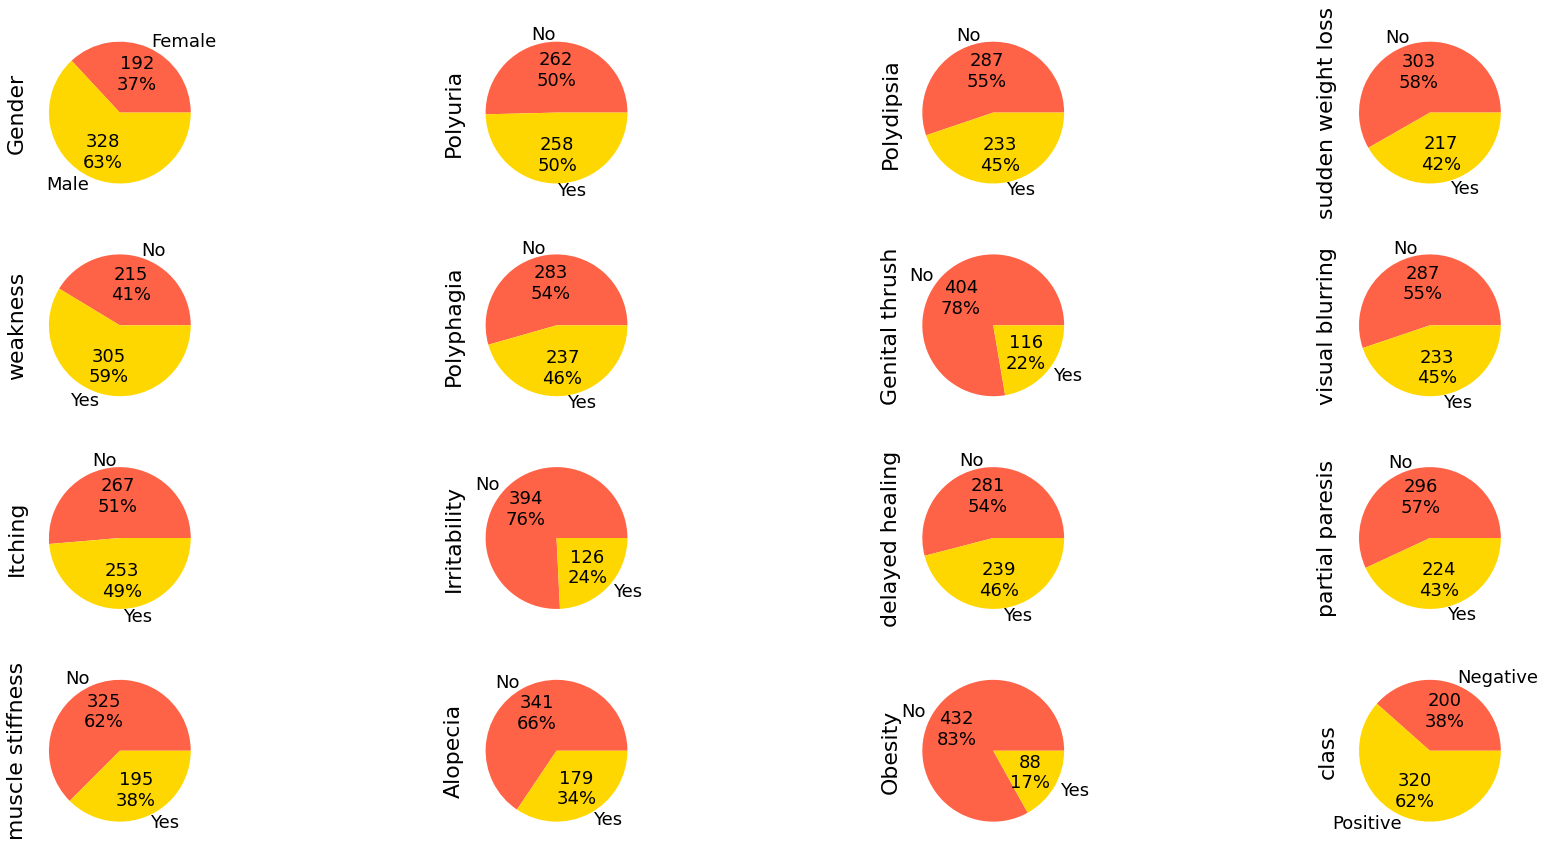

In [416]:
def labeling_graph(val):  #stackoverflow
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'  #labeling the graphs with percentage and total count

fig = plt.figure(figsize=(30,15)) 
for idx,column in  enumerate(data.loc[:,data.columns != 'Age']): # plot every column except Age amd also count every loop
  fig.add_subplot(4,4,idx+1) #enumerate starts at 0 , subplot needs start value 1
  data.groupby(column).size().plot(kind='pie', autopct=labeling_graph, textprops={'fontsize': 18},
                                    colors=['tomato', 'gold'])
  plt.ylabel(column, size=22) #plotting label on y_axis

With the histogram plot we can see, that the dataset represent the whole bandwith of age from 16 to 90, with a pretty normal demogrphic chart for a developement country.

count    520.000000
mean      48.028846
std       12.151466
min       16.000000
25%       39.000000
50%       47.500000
75%       57.000000
max       90.000000
Name: Age, dtype: float64

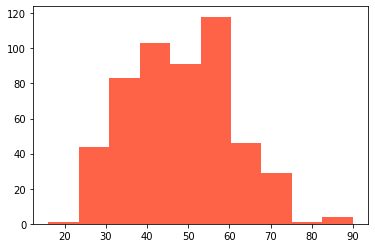

In [417]:
plt.hist(data['Age'],color = 'tomato' )
data['Age'].describe()

In [418]:
positivedataframe = data[data['class']=='Positive'] #get a dataframe only. with diabetes positiv cases

Below i plotted the same graph as above , but only with the data of positive diabetes cases, to see any trends of features. Interestingly we can see that the Gender, Polyuria and Polydipsia changed the balance . In  the whole dataset the balance of the gender was 63% male and only 37% female, but from the positive tested person there are more females(54%) than men. Also we can see, that nearly 75% of the positiv tested person have issues with excessive thirst and peeing (Polyuria and Polydipsia). Probably those 2 syptoms are the most relevant for the indication of diabetes 

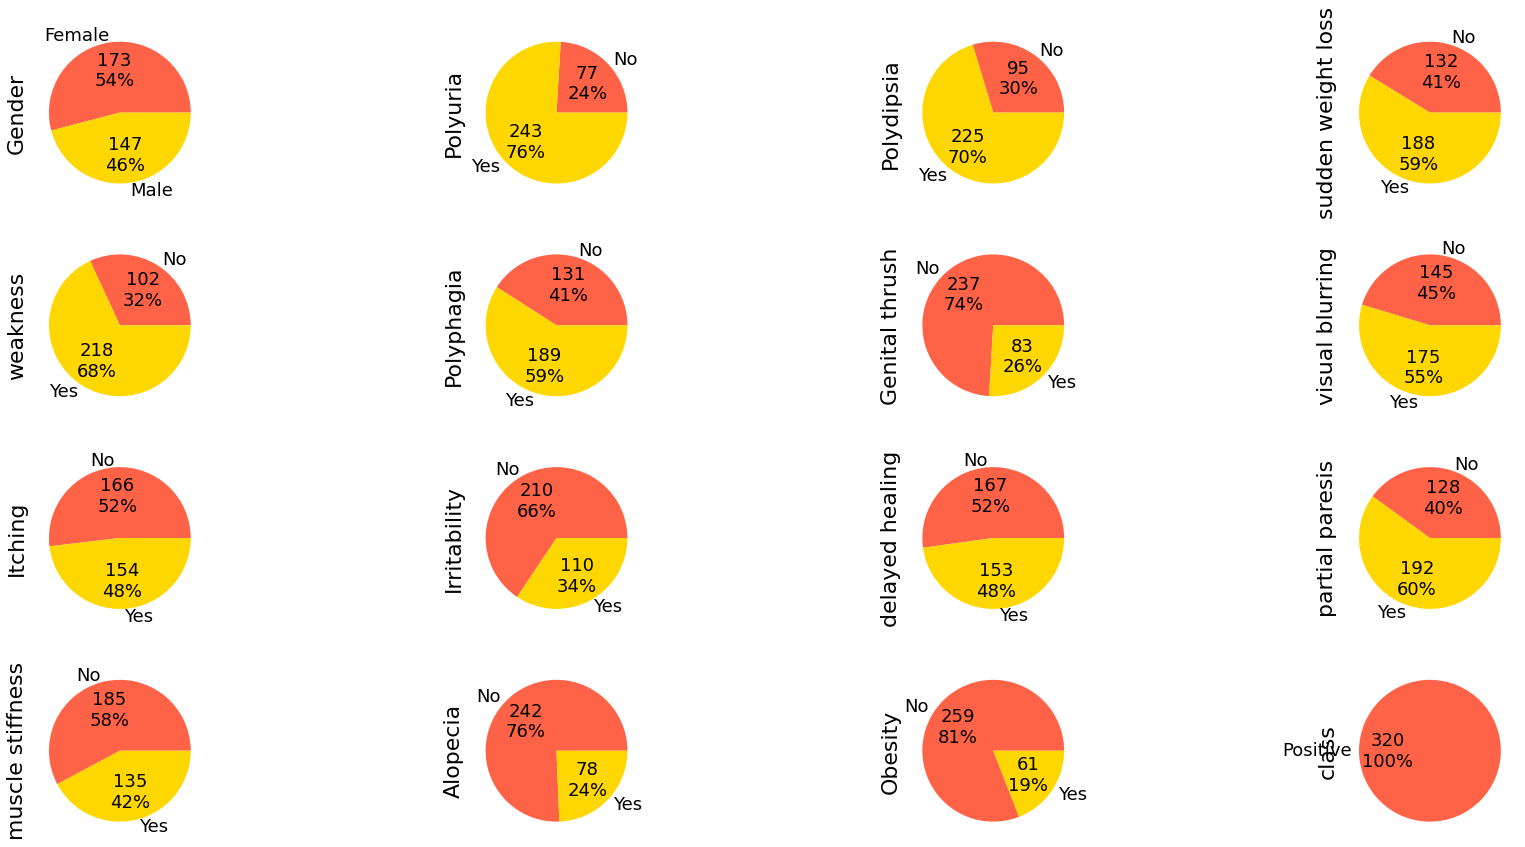

In [419]:
fig2 = plt.figure(figsize=(30,15))

def labeling_graph(val):  #stackoverflow
    return f'{val / 100 * len(positivedataframe):.0f}\n{val:.0f}%'  #labeling the graphs with percentage and total count
for idx,column in  enumerate(positivedataframe.loc[:,positivedataframe.columns != 'Age']): # plot every column except Age amd also count every loop
  fig2.add_subplot(4,4,idx+1) #enumerate starts at 0 , subplot needs start value 1
  positivedataframe.groupby(column).size().plot(kind='pie', autopct=labeling_graph, textprops={'fontsize': 18},
                                    colors=['tomato', 'gold'])
  plt.ylabel(column, size=22) #plotting label on y_axis

### Encoding Data

We can see that the data consists of variable types int and object.
To prepare the data, we have to encode the features with different encoding methods.

In [420]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

**Changing classification values**

change the values for the classification label:
Pos --> 1 , Negative -->0

In [421]:
data["class"] = np.where(data["class"].str.contains("Pos"), 1, 0)
data["class"].value_counts()

1    320
0    200
Name: class, dtype: int64

**Changing Gender Values**

2 different options, 2nd option seem to produce better results.


1.Option

Here we encode the gender with  Male --> 0 and Female -->1

In [422]:
#data["Gender"] = np.where(data["Gender"].str.contains("Male"), 0, 1)
#data["Gender"].value_counts()

2.Option

Here we one hot encode:
So we generate a new feature female and another new feature male 

In [423]:
onehot = pd.get_dummies(data['Gender']) #get onhotencoded Gender column

data = data.drop('Gender',axis = 1) #delete original Gender column form df
data = data.join(onehot) #add Gender column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Polyuria            520 non-null    object
 2   Polydipsia          520 non-null    object
 3   sudden weight loss  520 non-null    object
 4   weakness            520 non-null    object
 5   Polyphagia          520 non-null    object
 6   Genital thrush      520 non-null    object
 7   visual blurring     520 non-null    object
 8   Itching             520 non-null    object
 9   Irritability        520 non-null    object
 10  delayed healing     520 non-null    object
 11  partial paresis     520 non-null    object
 12  muscle stiffness    520 non-null    object
 13  Alopecia            520 non-null    object
 14  Obesity             520 non-null    object
 15  class               520 non-null    int64 
 16  Female              520 no

**Scaling Age**

Standardization of the Age


In [424]:
#Rescaling the data
scaler = pp.StandardScaler()
data['Age']= scaler.fit_transform(data[['Age']])
#Looking into the statistics again:
data['Age'].describe()

count    5.200000e+02
mean     4.035234e-17
std      1.000963e+00
min     -2.638339e+00
25%     -7.437407e-01
50%     -4.356309e-02
75%      7.389884e-01
max      3.457325e+00
Name: Age, dtype: float64

***Encode the features 2-16***


changing the value of the rest of the features 3-15 , with yes --> 1 and no --> 0

In [425]:
for column in range(1,15,1):
  data[data.columns[column]] = np.where(data[data.columns[column]].str.contains("Yes"), 1, 0)

**Overview of the encoded data**

In [426]:
data.head() #showing the encoded dataframe

,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Female,Male
0,-0.661367,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0,1
1,0.821362,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1
2,-0.578993,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1
3,-0.249498,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,0,1
4,0.986110,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1


##Correlation matrix
After we encoded the values from string binary values to int binary values we can examine the different features a bit more.
We will use the correlation matrix to detect dependencies in the features.

We can instantly see that Polydipsia and Polyuria strongly correlate to each other. Thats is logical explainable: if you have a lot of thirst and drink a lot you have a large production of urine in your body. This high correlation of the features would allow to combine those features. I tried the model with the combined feature (calculated with (Polydipsia+Polyuria)/2). But the score of the model got a bit worse. So I decided against it, because of the small dataset, runtime is with 16 features still short enough.


We can also see that Polyuria, Polydipsia and the Female gender have high correlation with the classification of the diabetis. This underlines the thesis from the above pie plots, that these features have a strong impact on the classification of diabetes.

In [427]:
correlationMatrix = pd.DataFrame(data).corr() 

correlationMatrix.style.background_gradient(cmap='viridis').set_precision(2)

,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Female,Male
Age,1.00,0.20,0.14,0.06,0.22,0.32,0.10,0.40,0.30,0.20,0.26,0.23,0.31,0.32,0.14,0.11,-0.06,0.06
Polyuria,0.20,1.00,0.60,0.45,0.26,0.37,0.09,0.24,0.09,0.24,0.15,0.44,0.15,-0.14,0.13,0.67,0.27,-0.27
Polydipsia,0.14,0.60,1.00,0.41,0.33,0.32,0.03,0.33,0.13,0.20,0.12,0.44,0.18,-0.31,0.10,0.65,0.31,-0.31
sudden weight loss,0.06,0.45,0.41,1.00,0.28,0.24,0.09,0.07,-0.00,0.14,0.09,0.26,0.11,-0.20,0.17,0.44,0.28,-0.28
weakness,0.22,0.26,0.33,0.28,1.00,0.18,0.03,0.30,0.31,0.15,0.34,0.27,0.26,0.09,0.05,0.24,0.12,-0.12
Polyphagia,0.32,0.37,0.32,0.24,0.18,1.00,-0.06,0.29,0.14,0.24,0.26,0.37,0.32,-0.05,0.03,0.34,0.22,-0.22
Genital thrush,0.10,0.09,0.03,0.09,0.03,-0.06,1.00,-0.15,0.13,0.16,0.14,-0.20,-0.10,0.20,0.05,0.11,-0.21,0.21
visual blurring,0.40,0.24,0.33,0.07,0.30,0.29,-0.15,1.00,0.29,0.08,0.18,0.36,0.41,0.01,0.11,0.25,0.21,-0.21
Itching,0.30,0.09,0.13,-0.00,0.31,0.14,0.13,0.29,1.00,0.11,0.45,0.12,0.22,0.27,0.00,-0.01,0.05,-0.05
Irritability,0.20,0.24,0.20,0.14,0.15,0.24,0.16,0.08,0.11,1.00,0.13,0.15,0.20,0.04,0.13,0.30,0.01,-0.01


##Preparing Test and Training data

Like in the Process flow explained i will split the data into 80% Training data and 20% Test data


In [428]:
dataX = data.copy().drop(['class'],axis=1)
dataY = data['class'].astype(int).copy()

X_train, X_test, Y_train, Y_test = train_test_split(dataX, dataY, test_size=0.20,
                                                random_state=2021, stratify=dataY)

Implement the k-fold cross validation.
We will split the Trainingset in 5 independent Training sets.

In [429]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=2021)

# Testing Phase I: Baseline Models

##Scoring

As disscused in the introduction, i would like to use the ratio of precision and recall to determine the score of the model. A typical model to calculate that score is the Fbeta-Score.

The beta describes the weight of precison to recall.
The Formula is shown in the pciture below.

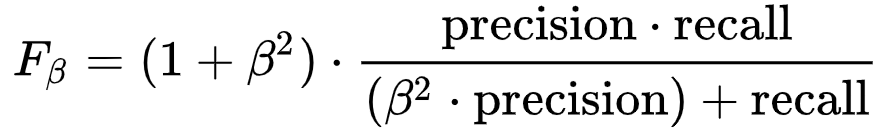


To get more information about it, see below in the hyperlinks.


https://en.wikipedia.org/wiki/F-score

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html



In [430]:
#introducing scoring function
beta_value = 2 #weight precision recall
score = make_scorer(fbeta_score,beta = beta_value) #scorer for the gridsearch


def fscore(model,X_data,Y_data):
  y_pred = model.predict(X_data) #get predicted y values from model
  fbeta_scored = fbeta_score(Y_data,y_pred, beta = beta_value) #calculate score

  return fbeta_scored

def evaluatemodel(model,X_data,Y_data):   #score function for every model
  plot_confusion_matrix(model,X_data,Y_data,cmap='Blues')

  y_pred = model.predict(X_data) #get predicted y values from model
  fbeta_scored = fbeta_score(Y_data,y_pred, beta = beta_value) #calculate score

  model_name = model.__class__.__name__

  print('------------------------')
  print(model_name+' Fbeta Score' ,fbeta_scored)
  print('------------------------')

  return fbeta_scored

## Support Vector Machine

Below i will use a special Type of Support Vector Machine. It specialized for binary classification.

From the Hyperparmeter the Kernel had a big impact. 
In the follwing Gridsearch the 'rbf' kernel will be selected as best kernel.

From the values of the crossvalidation and the Training score we can see that the model already perfoms quite good, and didnt overfitt.

In [431]:
kernel='linear' 
gamma='scale' # for rbf kernel
C=1    
shrinking=True 
tol=0.00001

#inserting parameters in model:
svc = SVC(kernel= kernel, gamma=gamma, tol=tol, C=C,  shrinking=shrinking)
model = svc

In [432]:
#generating indices for the k-fold split to select training and test data:
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),Y_train.ravel()):

  X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
  Y_train_fold, y_cv_fold = Y_train.iloc[train_index], Y_train.iloc[cv_index]

  #Fitting the model to the data:
  model.fit(X_train_fold, Y_train_fold)
  
  #getting scores from Training data:
  scoreTraining = fscore(model,X_train_fold, Y_train_fold)

  #getting scores from k-fold test data:
  scoreCV = fscore(model,X_cv_fold, y_cv_fold)

  #printing the results:
  print('Training Score: ', scoreTraining)
  print('CV Score: ', scoreCV)

Training Score:  0.9368932038834953
CV Score:  0.9297520661157024
Training Score:  0.9607843137254901
CV Score:  0.8846153846153846
Training Score:  0.9519136408243377
CV Score:  0.9302325581395349
Training Score:  0.9251769464105157
CV Score:  0.9025270758122744
Training Score:  0.9480269489894129
CV Score:  0.9361702127659574


**F_Score Training Data**

As we can see below the trained model has already a good Training Score

------------------------
SVC Fbeta Score 0.9458398744113031
------------------------


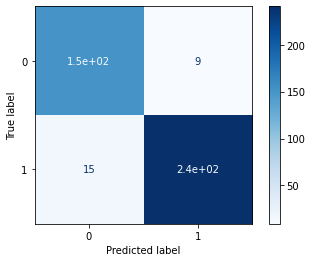

In [433]:
f_betaTrain= evaluatemodel(model,X_train,Y_train)

**F_Score Test Data**

The model performs also already pretty well with the Test Data, we got a Score of above 0.92,and only 4 FalseNegatives. But leets see if we could improve the result with a grid search.

------------------------
SVC Fbeta Score 0.925925925925926
------------------------


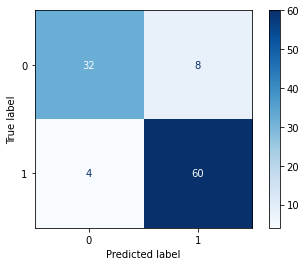

In [434]:
f_betaTest=evaluatemodel(model,X_test,Y_test)

###Grid Searching for SVM
Optimizing Hyperparmaters for the SVC model with the help of grid search.

We can see that the best Kernel to slect for that problem is the rbf Kernel.






In [435]:
kernels = ['poly','rbf','sigmoid']
Cs = np.logspace(0, 3, 25)

grid = {'kernel': kernels,'C':Cs}

gridSearch = GridSearchCV(svc, grid, scoring=score, cv=k_fold, refit=True) #using fbetascore
gridSearch.fit(X_train, Y_train)
results = gridSearch.cv_results_

print('Best fbeta_score obtained:', gridSearch.best_score_)
print('kernel value for the best case:', gridSearch.best_estimator_.kernel)
print('C value for the best case:', gridSearch.best_estimator_.C)

Best fbeta_score obtained: 0.9805494333387431
kernel value for the best case: rbf
C value for the best case: 4.216965034285822


**F_ScoreTestDataGs**

Showing Score and the confusion matrix of the model with test data after Hyperparmater optimization, we can see that the result improved. We have now a score of 0.99 and got 0 false negatives and only 3 false positives. Thats a very good result!

------------------------
SVC Fbeta Score 0.9907120743034054
------------------------


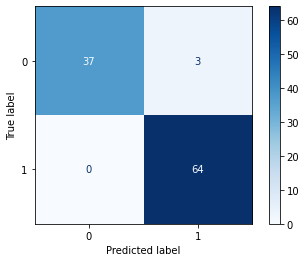

In [436]:
model = gridSearch.best_estimator_  #using the model from gridsearch with the best hyperparameters

f_betaTestGs=evaluatemodel(model,X_test,Y_test)

We will use this result dataframe to save the result from the different models to compare them afterwards.

In [437]:
resultdf = pd.DataFrame(columns = ['F_Score_Training','F_Score_Test',
                                         'F_Score_Test_GS']) #creating dataframe to save model results
                                         
model_name = model.__class__.__name__ #getting modelname

row = pd.Series({'F_Score_Training':f_betaTrain,'F_Score_Test':f_betaTest,
                 'F_Score_Test_GS':f_betaTestGs},name=model_name)
resultdf = resultdf.append(row)

resultdf.head()

,F_Score_Training,F_Score_Test,F_Score_Test_GS
SVC,0.94584,0.925926,0.990712


## Decision Tree

As the 2nd model i choose the Decision Tree as classification model.
For the Hyperparmeter i tried to change some, but the best result was always with the standard configuration. I only selected the maximal depth of the tree to avoid overfitting.
The results from the Training and Crossvalidation Score are already very promising. With values close to 1.

In [438]:
treeclass = tree.DecisionTreeClassifier(max_depth = 8) #to prevent overfitting use maximal depth of 8 
model = treeclass

In [439]:
#generating indices for the k-fold split to select training and test data:
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),Y_train.ravel()):

  X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
  Y_train_fold, y_cv_fold = Y_train.iloc[train_index], Y_train.iloc[cv_index]

  #Fitting the model to the data:
  model.fit(X_train_fold, Y_train_fold)
  
  #getting scores from Training data:
  scoreTraining = fscore(model,X_train_fold, Y_train_fold)

  #getting scores from k-fold test data:
  scoreCV = fscore(model,X_cv_fold, y_cv_fold)

  #printing the results:
  print('Training Score: ', scoreTraining)
  print('CV Score: ', scoreCV)

Training Score:  0.9922555663117134
CV Score:  0.9631147540983607
Training Score:  1.0
CV Score:  0.9459459459459459
Training Score:  0.9960745829244357
CV Score:  0.9845559845559845
Training Score:  0.9959959959959959
CV Score:  0.9677419354838711
Training Score:  0.996168582375479
CV Score:  0.9915611814345993


**F_Score Training Data**

As we can see below the trained model has already a good Training Score with 0.99. So near perfect. Lets see how well it performs wit the Test Dataset.

------------------------
DecisionTreeClassifier Fbeta Score 0.9953161592505855
------------------------


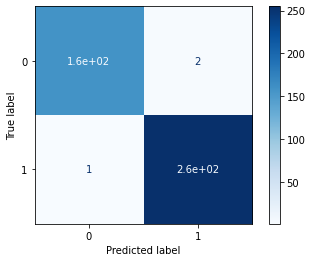

In [440]:
f_betaTrain=evaluatemodel(model,X_train,Y_train)

**F_Score Test Data**

With the unoptimized Tree classifier we got already a score to 0.99 with only 2 false Positivs. So also a very good result.

------------------------
DecisionTreeClassifier Fbeta Score 0.9937888198757764
------------------------


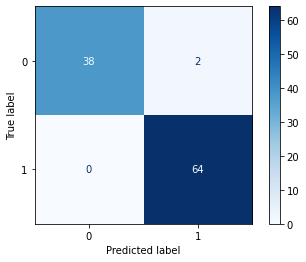

In [441]:
f_betaTest = evaluatemodel(model,X_test,Y_test)

**DecisionTree Plot**

Below we can see the DecisionTree and all the branches. We can also see the selected feature to split the data. Interestingly we can see that the first feature to split the data is the Polyuria feature.

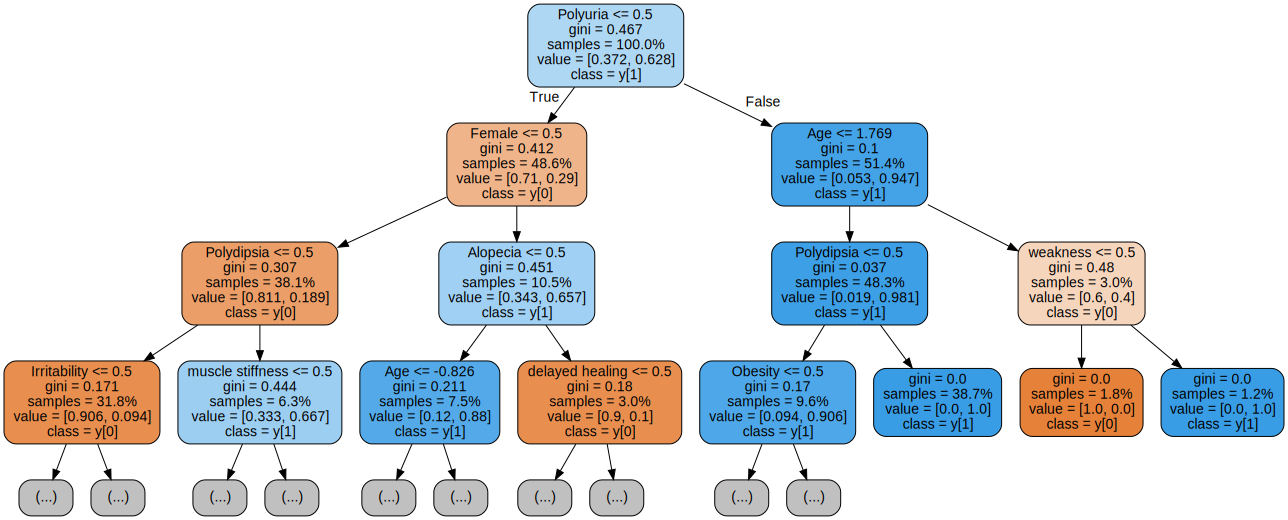

In [442]:
tree = export_graphviz(model, out_file = None, max_depth=3,
                       feature_names = X_train.columns, impurity = True,
                       filled = True, rounded = True, proportion = True,
                       class_names = True)
display(graphviz.Source(tree))

###Grid Searching Hyperparameters

Now lets try to improve the DecisionTree maybe a bit more.

In [443]:
min_samples_splits = range(2,20)
max_depths = range(1,20)

grid = {'min_samples_split': min_samples_splits,'max_depth':max_depths}
score = make_scorer(fbeta_score,beta = 2) #weighinig recall to precission 2:1

gridSearch = GridSearchCV(treeclass, grid, scoring=score, cv=k_fold, refit=True)
gridSearch.fit(X_train, Y_train)
results = gridSearch.cv_results_

print('Best fbeta_score obtained:', gridSearch.best_score_)
print('max_depth value for the best case:', gridSearch.best_estimator_.max_depth)
print('min_samples_split for the best case:', gridSearch.best_estimator_.min_samples_split)

Best fbeta_score obtained: 0.9738793768310188
max_depth value for the best case: 8
min_samples_split for the best case: 4


**F_ScoreTestDataGs**

Showing Score and the confusion matrix of the model with test data after Hyperparmater optimization, we can see that the result didnt improve. I tried it also with bigger search spaces and different Hyperparameters, but didnt get any better results. For runtime i narrowed the search space for the gridsearch down.

------------------------
DecisionTreeClassifier Fbeta Score 0.9748427672955975
------------------------


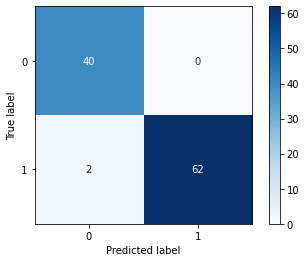

In [444]:
model = gridSearch.best_estimator_  #using the model from gridsearch with the best hyperparameters
f_betaTestGs=evaluatemodel(model,X_test,Y_test)

In [445]:
model_name = model.__class__.__name__

row = pd.Series({'F_Score_Training':f_betaTrain,'F_Score_Test':f_betaTest,
                 'F_Score_Test_GS':f_betaTestGs},name=model_name)
resultdf = resultdf.append(row)

## Random Forest

Reading in litrature the Random Forst often performs well with binary classification because of its sturcutre. The Random Forest is part of the ensemble classifiers.

We can already see wit the CV-Score and the. Training-Score that we are able to achieve outstanding results. We get no wrong classification with the Training data. Normaly if the CV Score would be low, this would be a clear sign of overfitting, but the CV Score is also good.

In [446]:
RaForclf = RandomForestClassifier()

model=RaForclf 

In [447]:
#generating indices for the k-fold split to select training and test data:
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),Y_train.ravel()):

  X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
  Y_train_fold, y_cv_fold = Y_train.iloc[train_index], Y_train.iloc[cv_index]

  #Fitting the model to the data:
  model.fit(X_train_fold, Y_train_fold)
  
  #getting scores from Training data:
  scoreTraining = fscore(model,X_train_fold, Y_train_fold)

  #getting scores from k-fold test data:
  scoreCV = fscore(model,X_cv_fold, y_cv_fold)

  #printing the results:
  print('Training Score: ', scoreTraining)
  print('CV Score: ', scoreCV)

Training Score:  1.0
CV Score:  0.9631147540983607
Training Score:  1.0
CV Score:  0.9496124031007752
Training Score:  1.0
CV Score:  1.0
Training Score:  1.0
CV Score:  0.9677419354838711
Training Score:  1.0
CV Score:  0.9829059829059827


**F_Score Training Data**

As we can see below the trained model has already a good Training Score with 0.99. So near perfect. Lets see how well it performs wit the Test Dataset.

------------------------
RandomForestClassifier Fbeta Score 0.99687255668491
------------------------


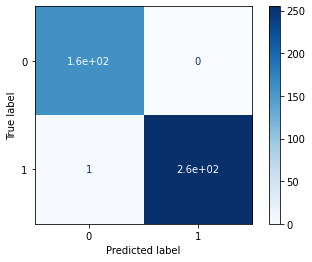

In [448]:
f_betaTrain=evaluatemodel(model,X_train,Y_train)

**F_Score Test Data**

The result of the classifier is with 0.996 near perfect, only 1 false positive classified.

------------------------
RandomForestClassifier Fbeta Score 0.9968847352024922
------------------------


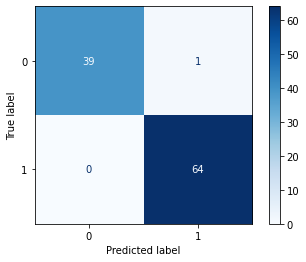

In [449]:
f_betaTest=evaluatemodel(model,X_test,Y_test)

**Importance of features for the random forst**


Below we can see an horizontal bar graph, that represents the importance (gini importance) of the different features for the Random Forest. As we already recognized Polyuria and Polydipsia are imoprtant features for the diabetes classification.

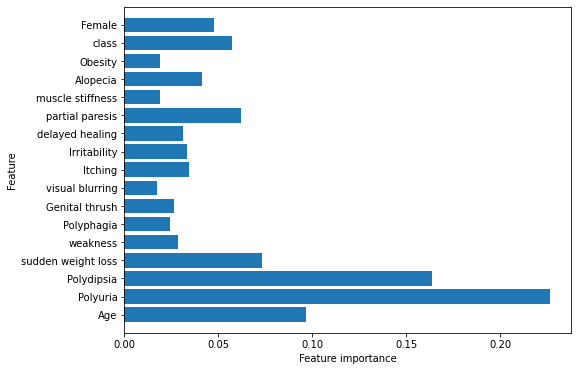

In [450]:
diabetes_features = [x for i,x in enumerate(data.columns) if i!='class']
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_diabetes(model) #gini importance

###Grid Search Hyperparameters

We try to optimize the RandomForest with adjusting the Hyperparameters.


In [451]:
n_estimators = range(4,13) #got adjusted from range(2,15)for runtime to smaller
max_depths = range(7,15)  #got adjusted from range(1,15)for runtime to smaller
max_features  = range(1,6) #got adjusted from range(1,15)for runtime to smaller

grid = {'n_estimators': n_estimators,'max_depth':max_depths ,'max_features':max_features}
score = make_scorer(fbeta_score,beta = 2) #weighinig recall to precission 2:1

gridSearch = GridSearchCV(RaForclf , grid, scoring=score, cv=k_fold, refit=True)
gridSearch.fit(X_train, Y_train)
results = gridSearch.cv_results_

print('Best fbeta_score obtained:', gridSearch.best_score_)
print('max_depth value for the best case:', gridSearch.best_estimator_.max_depth)
print('max_features for the best case:', gridSearch.best_estimator_.max_features)
print('n_estimators for the best case:', gridSearch.best_estimator_.n_estimators)

Best fbeta_score obtained: 0.983148892178245
max_depth value for the best case: 9
max_features for the best case: 4
n_estimators for the best case: 11


**F_ScoreTestDataGs**

The GridSearch didnt improve to the original model.

------------------------
RandomForestClassifier Fbeta Score 0.9968847352024922
------------------------


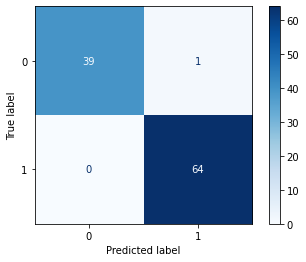

In [452]:
model = gridSearch.best_estimator_  #using the model from gridsearch with the best hyperparameters

f_betaTestGs=evaluatemodel(model,X_test,Y_test)

In [453]:
model_name = model.__class__.__name__

row = pd.Series({'F_Score_Training':f_betaTrain,'F_Score_Test':f_betaTest,
                 'F_Score_Test_GS':f_betaTestGs},name=model_name)
resultdf = resultdf.append(row)

##Logistic regression

Using a linear model for classification.

From the CV Results and the Training results we could say, that the model is  underfitted with the standard parameters.

In [454]:
LogReg = LogisticRegression(solver = 'liblinear')
model = LogReg

In [455]:
#generating indices for the k-fold split to select training and test data:
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),Y_train.ravel()):

  X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
  Y_train_fold, y_cv_fold = Y_train.iloc[train_index], Y_train.iloc[cv_index]

  #Fitting the model to the data:
  model.fit(X_train_fold, Y_train_fold)
  
  #getting scores from Training data:
  scoreTraining = fscore(model,X_train_fold, Y_train_fold)

  #getting scores from k-fold test data:
  scoreCV = fscore(model,X_cv_fold, y_cv_fold)

  #printing the results:
  print('Training Score: ', scoreTraining)
  print('CV Score: ', scoreCV)

Training Score:  0.9359844810863239
CV Score:  0.9259259259259259
Training Score:  0.9519136408243377
CV Score:  0.8846153846153846
Training Score:  0.9421000981354268
CV Score:  0.9266409266409267
Training Score:  0.935935935935936
CV Score:  0.9642857142857143
Training Score:  0.9374999999999998
CV Score:  0.9322033898305083


**F_Score Training Data**

The result is ok , but there is room for improvement.

------------------------
LogisticRegression Fbeta Score 0.9365203761755487
------------------------


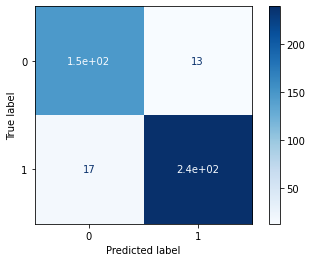

In [456]:
f_betaTrain=evaluatemodel(model,X_train,Y_train)

**F_Score Test Data**

Also for the Test Data the result is ok , but i think we could tweak the model a bit more.

------------------------
LogisticRegression Fbeta Score 0.9355828220858897
------------------------


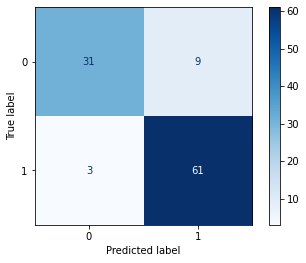

In [457]:
f_betaTest=evaluatemodel(model,X_test,Y_test)

###Grid Search Hyperparameters

In [458]:
Cs = np.logspace(0, 3, 25)
penaltys = ['l1','l2']
grid = {'penalty': penaltys,'C':Cs}

score = make_scorer(fbeta_score,beta = 2) #weighinig recall to precission 2:1

gridSearch = GridSearchCV(LogReg , grid, scoring=score, cv=k_fold, refit=True)
gridSearch.fit(X_train, Y_train)
results = gridSearch.cv_results_

print('Best fbeta_score obtained:', gridSearch.best_score_)
print('C for the best case:', gridSearch.best_estimator_.C)
print('penalty for the best case:', gridSearch.best_estimator_.penalty)

Best fbeta_score obtained: 0.9304928326173346
C for the best case: 10.0
penalty for the best case: l2


**F_ScoreTestDataGs**

The GridSearch improved the results of the model.

------------------------
LogisticRegression Fbeta Score 0.9726443768996961
------------------------


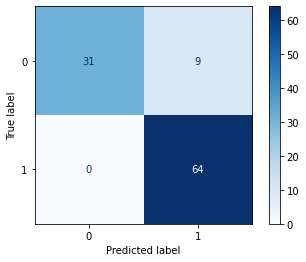

In [459]:
model = gridSearch.best_estimator_  #using the model from gridsearch with the best hyperparameters

f_betaTestGs=evaluatemodel(model,X_test,Y_test)

In [460]:
model_name = model.__class__.__name__

row = pd.Series({'F_Score_Training':f_betaTrain,'F_Score_Test':f_betaTest,'F_Score_Test_GS':f_betaTestGs},name=model_name)
resultdf = resultdf.append(row)

##Dimensionality Reduction

In the following part i tried 2 different things with PCA. The first one was to visualize the highdimensional data with 2d or 3d plots. The 2nd part was to inevestigate the impact of pca on the scoring of the models.

But using the PCA analysis on binary data is quite a controversal topic, some people say its a sin and others say its ok.
https://stats.stackexchange.com/questions/16331/doing-principal-component-analysis-or-factor-analysis-on-binary-data

https://stackoverflow.com/questions/40795141/pca-for-categorical-features

I still tried to use pca for my dataset, because the other options i found aren't that clear to me, or aren't implemented in common software libaries.


###Visualizing the high dimensional data


In [461]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
#-----------------
# Hyperparameters:
#-----------------

n_components = 16 #maximal sample count
whiten = False #Default option
svd_solver = 'auto'
random_state = 2021

pca = PCA(n_components=n_components, whiten=whiten, svd_solver = svd_solver, random_state=random_state)

In [462]:
# Model Implementation:

#Fit the model with X and apply the dimensionality reduction on X
X_train_PCA = pca.fit_transform(X_train)

# Organizing the data:
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

#Transform data back to its original space:
X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
# Organizing the data:
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, index=X_train.index)

**2D Visualization**

In the plot we can see that the data is not easy seperable, there are no clear clusters where you could easily draw a line inbetween. But there ist a trend visible. We can also see that there are only some outliers. This means that we need more dimensions to seperate the Datset complitly.

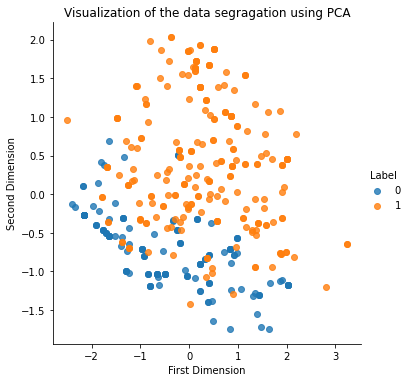

In [463]:
#code copied from ITS
def scatterPlot(x_DF, y_DF, methodName):
  #Filtering the first two columns (first two dimensions):
  df = pd.DataFrame(data=x_DF.loc[:,0:1], index=x_DF.index)
  #Adding the labels:
  df = pd.concat((df,y_DF), axis=1, join="inner")
  #Labeling the columns
  df.columns = ["First Dimension", "Second Dimension", "Label"]
  sns.lmplot(x="First Dimension", y="Second Dimension", hue="Label", data=df, fit_reg=False)
  ax = plt.gca()
  ax.set_title("Visualization of the data segragation using "+methodName)

scatterPlot(X_train_PCA, Y_train, "PCA")

**3D Visualization**

In 3D it already easier to seperate the clusters from each other. But still not enough to seperate it perfectly. So we need more dimensions to seperate the data, lets investigate this in the next step.

In [464]:
#code copied from ITS

def scatterPlot3D(x_DF, y_DF, methodName):
  #Filtering the first two columns (first three dimensions):
  df = pd.DataFrame(data=x_DF.loc[:,0:2], index=x_DF.index)
  #Adding the labels:
  df = pd.concat((df,y_DF), axis=1, join="inner")
  #Labeling the columns
  df.columns = ["First Dimension", "Second Dimension","Third Dimension", "Label"]

  # Plotting the figure:
  fig = px.scatter_3d(df, x='First Dimension', y='Second Dimension', z='Third Dimension',\
                      color='Label', symbol='Label', opacity=0.7, \
                      color_continuous_scale=px.colors.sequential.Viridis,
                      width = 600,
                      height = 500) 

  #https://plotly.com/python/reference/layout/#layout-transition
  title = "Visualization of the data segragation using "+methodName
  fig.update_layout(title_text=title, showlegend = True, hovermode = False)
  fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
  fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01))

  fig.show() 

scatterPlot3D(X_train_PCA, Y_train, "PCA")

###PCA with models

As described in the chapter before we need more than 3 Dimensions to seperate the data. In the plot below we can see how many components(dimensions) we need to describe the percentage of variance in the dataset.

I tried different values for the cumulative variance. For low cumulative variance the score of the models got also lower. The value of 90% is a sweetspot where the scores of the models are equal to the non pca models.

So in conclusion I would say that there is no real benefit for this small datset to use pca.

In the following i will do the same process flow as before, so i won't explain to much in there. In the conclusion we can see than the impact of the pca on the score.

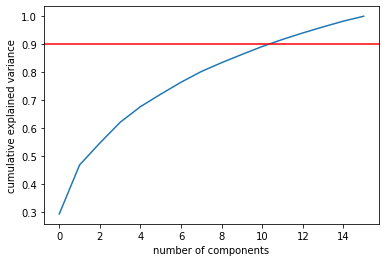

In [465]:
#showing how many components are needed for which cumulative variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.9, color='r', linestyle='-') #line at 90%

pca = PCA(0.9,random_state=random_state) #setting the PCA that it should have a variance above 90%

pca.fit(X_train) #fitting PCA

X_train_pca1 = pca.transform(X_train) #transforming the data with pca
X_test_pca1 = pca.transform(X_test) #transforming the data with pca

####Logistic Regression

------------------------
LogisticRegression Fbeta Score 0.9365203761755487
------------------------


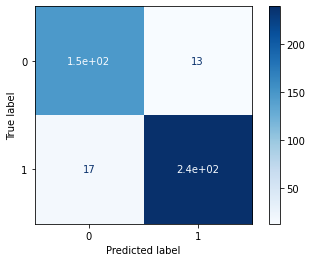

In [466]:
LogReg = LogisticRegression(solver = 'liblinear')
model = LogReg

model.fit(X_train_pca1,Y_train)

f_betaTrain = evaluatemodel(model,X_train_pca1,Y_train)

------------------------
LogisticRegression Fbeta Score 0.9633027522935778
------------------------


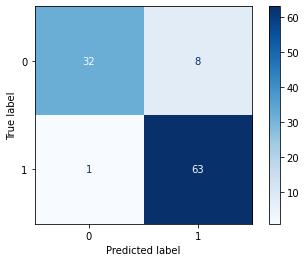

In [467]:
f_betaTest = evaluatemodel(model,X_test_pca1,Y_test)

**Grid Search**

Try to improve the model, with the new pca Data. And the best Hyperparameters are not the same, as the normal model. For example for the normal model we should have used l2 as penalty in the pca model we should use the l1 penalty.

In [468]:
Cs = np.logspace(0, 3, 25)
penaltys = ['l1','l2']
grid = {'penalty': penaltys,'C':Cs}

gridSearch = GridSearchCV(LogReg , grid, scoring=score, cv=k_fold, refit=True)
gridSearch.fit(X_train_pca1, Y_train)
results = gridSearch.cv_results_

print('Best fbeta_score obtained:', gridSearch.best_score_)
print('C for the best case:', gridSearch.best_estimator_.C)
print('penalty for the best case:', gridSearch.best_estimator_.penalty)

Best fbeta_score obtained: 0.9367922215940002
C for the best case: 2.371373705661655
penalty for the best case: l2


------------------------
LogisticRegression Fbeta Score 0.9603658536585366
------------------------


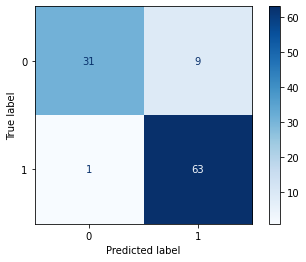

In [469]:
model = gridSearch.best_estimator_  #using the model from gridsearch with the best hyperparameters

f_betaTestGs = evaluatemodel(model,X_test_pca1,Y_test)

In [470]:
model_name = model.__class__.__name__

row = pd.Series({'F_Score_Training':f_betaTrain,'F_Score_Test':f_betaTest,'F_Score_Test_GS':f_betaTestGs},name='pca_'+model_name)
resultdf = resultdf.append(row)

####Random Forest

------------------------
RandomForestClassifier Fbeta Score 1.0
------------------------


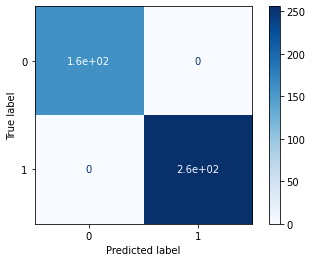

In [471]:
RaForclf = RandomForestClassifier()

model=RaForclf 

model.fit(X_train_pca1,Y_train)

f_betaTrain = evaluatemodel(model,X_train_pca1,Y_train)

------------------------
RandomForestClassifier Fbeta Score 0.981308411214953
------------------------


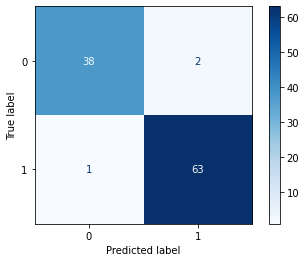

In [472]:
f_betaTest = evaluatemodel(model,X_test_pca1,Y_test)

**Grid Search**

In [473]:
n_estimators = range(4,13) #got adjusted from range(2,15)for runtime to smaller
max_depths = range(7,15)  #got adjusted from range(1,15)for runtime to smaller
max_features  = range(1,6) #got adjusted from range(1,15)for runtime to smaller

grid = {'n_estimators': n_estimators,'max_depth':max_depths ,'max_features':max_features}
score = make_scorer(fbeta_score,beta = 2) #weighinig recall to precission 2:1

gridSearch = GridSearchCV(RaForclf , grid, scoring=score, cv=k_fold, refit=True)
gridSearch.fit(X_train, Y_train)
results = gridSearch.cv_results_

print('Best fbeta_score obtained:', gridSearch.best_score_)
print('max_depth value for the best case:', gridSearch.best_estimator_.max_depth)
print('max_features for the best case:', gridSearch.best_estimator_.max_features)
print('n_estimators for the best case:', gridSearch.best_estimator_.n_estimators)

Best fbeta_score obtained: 0.9884087652209985
max_depth value for the best case: 12
max_features for the best case: 1
n_estimators for the best case: 11


------------------------
RandomForestClassifier Fbeta Score 0.9968847352024922
------------------------


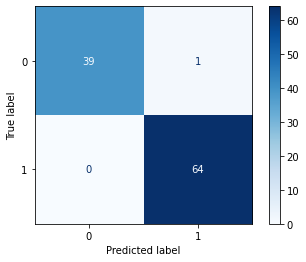

In [474]:
model = gridSearch.best_estimator_  #using the model from gridsearch with the best hyperparameters

f_betaTestGs=evaluatemodel(model,X_test,Y_test)

In [475]:
model_name = model.__class__.__name__

row = pd.Series({'F_Score_Training':f_betaTrain,'F_Score_Test':f_betaTest,
                 'F_Score_Test_GS':f_betaTestGs},name='pca_'+model_name )
resultdf = resultdf.append(row)

#### Support Vector Machine

In [476]:
kernel='linear' 
gamma='scale' # for rbf kernel
C=1    
shrinking=True 
tol=0.00001

#inserting parameters in model:
svc = SVC(kernel= kernel, gamma=gamma, tol=tol, C=C,  shrinking=shrinking)
model = svc

------------------------
SVC Fbeta Score 0.9421422986708365
------------------------


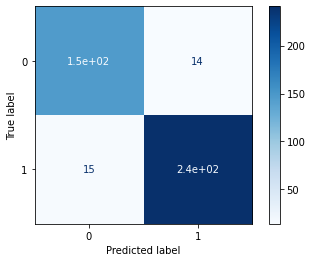

In [477]:
model.fit(X_train_pca1 , Y_train )

f_betaTrain = evaluatemodel(model,X_train_pca1,Y_train)

------------------------
SVC Fbeta Score 0.9726443768996961
------------------------


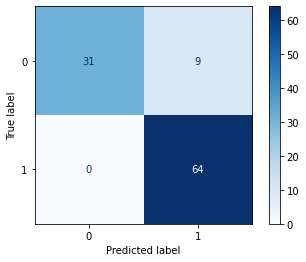

In [478]:
f_betaTest = evaluatemodel(model,X_test_pca1,Y_test)

**Grid Search**

In [479]:
kernels = ['poly','rbf','sigmoid']
Cs = np.logspace(0, 3, 25)

grid = {'kernel': kernels,'C':Cs}

gridSearch = GridSearchCV(svc, grid, scoring=score, cv=k_fold, refit=True) #using fbetascore
gridSearch.fit(X_train_pca1, Y_train)
results = gridSearch.cv_results_

print('Best fbeta_score obtained:', gridSearch.best_score_)
print('kernel value for the best case:', gridSearch.best_estimator_.kernel)
print('C value for the best case:', gridSearch.best_estimator_.C)

Best fbeta_score obtained: 0.9796243045746191
kernel value for the best case: poly
C value for the best case: 1.7782794100389228


------------------------
SVC Fbeta Score 0.9937888198757764
------------------------


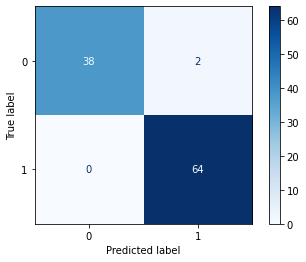

In [480]:
model = gridSearch.best_estimator_  #using the model from gridsearch with the best hyperparameters

f_betaTestGs=evaluatemodel(model,X_test_pca1,Y_test)

In [481]:
model_name = model.__class__.__name__

row = pd.Series({'F_Score_Training':f_betaTrain,'F_Score_Test':f_betaTest,
                 'F_Score_Test_GS':f_betaTestGs},name='pca_'+model_name)
resultdf = resultdf.append(row)

## Conclusion

In the Plot below we can see the different F_Score Results from the different classifiers. Every Classifier has an score above of 0.9. I think that this result is more than satisfying for the classifiers.
The best result is produced by the RandomForestClassifier without GridSearch optimizations, this shows that the standard models from scikit learn are already quite optimal.
Also i have to say that the datset seems good without any real outliers.

Points that i recognized:


*   For models like SVC and Logistic Regression the GridSearch was very helpful
*   For Tree models the result got worse with GridSearching. I tried it with various search spaces and never got a better result as the standard Trees
* The PCA Analysis showed that for 90% of the Variance nearly all features have to be selected, that means that the features have all a good information value for the classification. That is proably because the features are all approved syptoms of diabetes.
* The result for the classifiers logisitc Regression and RandomTrees got worse with dimensionality reduction. Only the svc classifier achieved a better result with the pca data.


So i would say that i would use the RandomTreeClassifier or the optimized SVC as Classifier for that problem. They both achieved a scoring near to perfect with the Testdataset. Also the use of dimensionality reduction is not that useful for this data.

So the initial working Hypothesis is already fullfiled with standard classifiers.


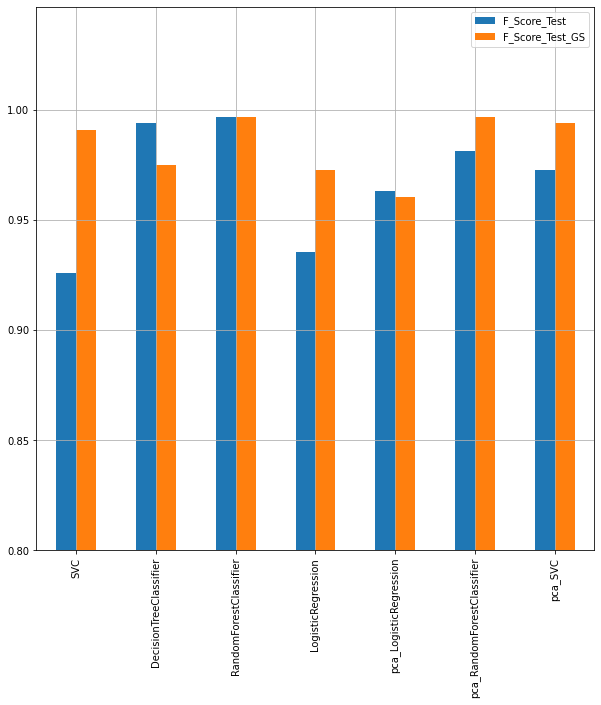

In [482]:
resultdf.plot.bar( grid = True, y= ['F_Score_Test','F_Score_Test_GS'],ylim = 0.8,figsize = (10,10) )

# Testing Phase II: Model Development

In this phase i will design a basic Neuronal Network for the classification task.

## Scoring Metrics

To get comparable results from the NN to the standard models from phase 1, we will also use the fscore metrics to evaluate the model.
Keras deletede the fbeta_score metric with the version 2.0.

So i used an implementation from:
https://towardsdatascience.com/f-beta-score-in-keras-part-i-86ad190a252f

It has all requirements for a statful metric for the keras package.

In [483]:
class StatefullBinaryFBeta(Metric):
  def __init__(self, name='state_full_binary_fbeta', beta=1, threshold=0.5, epsilon=1e-7, **kwargs):
    # initializing an object of the super class
    super(StatefullBinaryFBeta, self).__init__(name=name, **kwargs)

    # initializing state variables
    self.tp = self.add_weight(name='tp', initializer='zeros') # initializing true positives 
    self.actual_positive = self.add_weight(name='fp', initializer='zeros') # initializing actual positives
    self.predicted_positive = self.add_weight(name='fn', initializer='zeros') # initializing predicted positives

    # initializing other atrributes that wouldn't be changed for every object of this class
    self.beta_squared = beta**2 
    self.threshold = threshold
    self.epsilon = epsilon

  def update_state(self, ytrue, ypred, sample_weight=None):
    # casting ytrue and ypred as float dtype
    ytrue = tf.cast(ytrue, tf.float32)
    ypred = tf.cast(ypred, tf.float32)

    # setting values of ypred greater than the set threshold to 1 while those lesser to 0
    ypred = tf.cast(tf.greater_equal(ypred, tf.constant(self.threshold)), tf.float32)
        
    self.tp.assign_add(tf.reduce_sum(ytrue*ypred)) # updating true positives atrribute
    self.predicted_positive.assign_add(tf.reduce_sum(ypred)) # updating predicted positive atrribute
    self.actual_positive.assign_add(tf.reduce_sum(ytrue)) # updating actual positive atrribute

  def result(self):
    self.precision = self.tp/(self.predicted_positive+self.epsilon) # calculates precision
    self.recall = self.tp/(self.actual_positive+self.epsilon) # calculates recall

    # calculating fbeta
    self.fb = (1+self.beta_squared)*self.precision*self.recall / (self.beta_squared*self.precision + self.recall + self.epsilon)
    
    return self.fb

  def reset_states(self):
    self.tp.assign(0) # resets true positives to zero
    self.predicted_positive.assign(0) # resets predicted positives to zero
    self.actual_positive.assign(0) # resets actual positives to zero

**Confusion Matrix + F Score**

To get the same confusion Matrix as the standard Confusion Matrix from Scikit  with a NN. And also evaluate the fbeta Score.

In [484]:
def evaluate_nnmodel(model,X_data,Y_data,beta_value):

  y_preds = (model.predict(X_data)>0.5).astype('int32') #because predict_classes wont be supported in future
  cm = confusion_matrix(Y_data,y_preds)
  display_labels = ['0','1']
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=display_labels)
  include_values = 1
  cmap = plt.cm.Blues

  disp = disp.plot(include_values=include_values,cmap=cmap)

  plt.show()

  fbeta_scored = fbeta_score(Y_data,y_preds, beta = beta_value)

  print('------------------------')
  print('Fbeta Score' ,fbeta_scored)
  print('------------------------')

**Learning Curve**

To look at the progress of the model during training we will visualize the result of training and crossvalidation in a plot.

In [485]:
#From ITS
def plot_learning_curves(history):
  #We will omit the first 10 points for a better visualization:
  plt.plot(history['epoch'][10:],history['loss'][10:], "k--", linewidth=1.5, label="Training")
  plt.plot(history['epoch'][10:],history['val_loss'][10:], "b-.", linewidth=1.5, label="CV test")
  plt.legend()
  plt.yscale("log")
  plt.xlabel("Epochs"),  plt.ylabel("Binary Crossentropy")

##Standard Model

As Loss function i will use the recomended BinaryCrossentropy.
The last Layer will be also only one Neuron with the sigmoid activation function.

We try to get rid of the randomness of the NN with using random seeds for the initializing of the weights.

We will use the elu activation function for the hidden layers. Because the dataset is quite small and we dont have to worry about the runtime

As optimizer we will use for the first try the Stochastic Gradient Descent.


Fort the first model we will only use 1 hidden layer. The Input layer and the 2nd layer will have the same amount of Neurons as the amount of features in the dataset.

In [486]:
loss_function = 'BinaryCrossentropy'
activation_function = 'elu'
last_layer_activation_function = 'sigmoid'
optimizer = 'SGD'
#kernel_initializer=keras.initializers.glorot_uniform(seed=2021)
kernel_initializer = keras.initializers.he_uniform(seed=2021)
num_epochs = 300
batch_size = 10

statefull_binary_fbeta = StatefullBinaryFBeta(beta=beta_value)

In [487]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(X_train.shape[1], activation= activation_function, input_shape=(X_train.shape[1],),kernel_initializer=kernel_initializer))
  model.add(layers.Dense(X_train.shape[1], activation=activation_function,kernel_initializer=kernel_initializer))
  model.add(layers.Dense(1,activation = last_layer_activation_function,kernel_initializer=kernel_initializer))
  model.compile(optimizer=optimizer, loss=loss_function, metrics=statefull_binary_fbeta)
  return model

In [488]:
build_model().summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_152 (Dense)            (None, 17)                306       
_________________________________________________________________
dense_153 (Dense)            (None, 17)                306       
_________________________________________________________________
dense_154 (Dense)            (None, 1)                 18        
Total params: 630
Trainable params: 630
Non-trainable params: 0
_________________________________________________________________


In [489]:
np.random.seed(2021)

import random as rn
rn.seed(2021)

import tensorflow as tf
tf.random.set_seed(2021)

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),Y_train.ravel()):

  X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
  Y_train_fold, y_cv_fold = Y_train.iloc[train_index], Y_train.iloc[cv_index]

  #Building the Keras model:
  model = build_model()

  #Training step: Trains the model in silent mode (verbose = 0)
  history = model.fit(X_train_fold, Y_train_fold, epochs=num_epochs, 
                      batch_size=batch_size, validation_data=(X_cv_fold, y_cv_fold) ,verbose=0)

  #Evaluating the training pperformance:
  List_val = model.evaluate(X_train_fold, Y_train_fold, verbose=0)
  print('--------------------------------------------------------')
  print('Training Metrics: ', List_val)

  #Evaluating the CV pperformance:
  List_val = model.evaluate(X_cv_fold, y_cv_fold, verbose=0)
  print('CV Metrics: ', List_val)

list_val_total = model.evaluate(X_train, Y_train, verbose=0)
print('--------------------------------------------------------')
print('Metrics for the entire training dataset: ', list_val_total)
print('--------------------------------------------------------')

--------------------------------------------------------
Training Metrics:  [0.029265794903039932, 0.9980713725090027]
CV Metrics:  [0.05810156464576721, 0.9919028878211975]
--------------------------------------------------------
Training Metrics:  [0.034667570143938065, 0.997067391872406]
CV Metrics:  [0.22468672692775726, 0.9578543305397034]
--------------------------------------------------------
Training Metrics:  [0.03986334428191185, 0.9862610697746277]
CV Metrics:  [0.06577135622501373, 0.9689922332763672]
--------------------------------------------------------
Training Metrics:  [0.028844913467764854, 0.9940059781074524]
CV Metrics:  [0.13675902783870697, 0.9929077625274658]
--------------------------------------------------------
Training Metrics:  [0.02871687151491642, 0.9980897903442383]
CV Metrics:  [0.12738515436649323, 0.9787234663963318]
--------------------------------------------------------
Metrics for the entire training dataset:  [0.04840308800339699, 0.9945396780

In [490]:
model.metrics_names

['loss', 'state_full_binary_fbeta']

**Learning Curve**

We can see that the CV score is still going down. So for the next phase we will use more epochs to train the model.

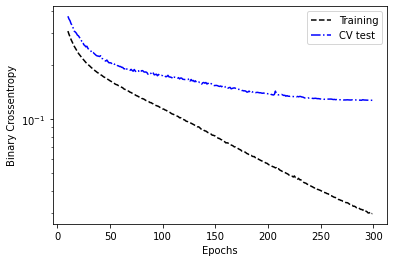

In [491]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plot_learning_curves(hist)

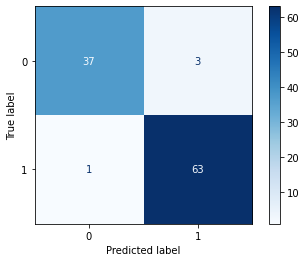

------------------------
Fbeta Score 0.9782608695652175
------------------------


In [492]:
evaluate_nnmodel(model,X_test,Y_test,beta_value)

##Conclusion

The prediciton capability of this Neuronal Network is good. But we try to improve the scoring of the NN in the next phase.

# Testing Phase III: Model Regularization and Hyperparameter optimization

I recognized one big problem with Neuronal Networks. That is the randomness of the Neuronal Network. I tried to get rid of that by selecting random seeds for every part of the calculation, but it still didn't worked. I achieved that in the same runtime the results are equal, but as soon as i restarted the runtime the results differ. That made it quite difficult to improve the NN on the last mile.

During testing i also recognized that i maybe need to decrease the number of splits for the kfold. Because the trainings sample were not enough for one training run. The results improved for 2 splits.

I also recognized that the model was still improving after 200 epochs so i increased the epochs count to 600. This led immediatly to overfitting of the model, even with only 1 hidden layer(See Picture). So i added early stopping to regularize the model.
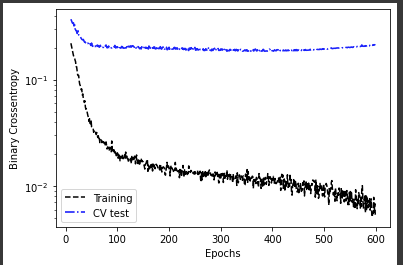

I didn't wanted to change the optimizer, because as you already wrote in the lecture_5 Jupyter Notebook, for easy models the SGD achieves often better classification scores than adaptive optimizers.

The Next step was to increase the Network size. At the maximum i tried 10 layers with up to 30 neurons ==> overfitting. I tried to use Dropout layers but then the Training Score would osciliate. In the next step i used weight Regularization. The aim was to get a big regularized Neuronal Network, but this still led to a overfitted Network.

So i started reducing the amount of layers and nodes again. And achieved better results. I also tried it with less neurons than input features, so that the Neuronal network has to compress the data (Autoencoder). This provided worse results. 

So I stopped with 2 hidden layers with the amounnt of neurons = input features and early stopping. This provided the best compromise between overfitting and underfitting.
In some runs the result of this NN were better than the results of the first network but sometimes it would be the other way round.
So its difficult to say if the Hyperparameter optimization had any impact on the quality of the NN.

The best score that was achieved with the Neuronal Network:

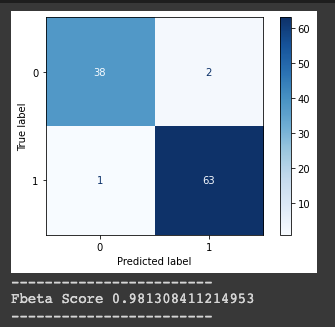

Additional Note:
At first I tried a kind of grid search with the amount of layers and Neurons, but that didn't worked well (see in addtional Code). So i tried it manually.



In [493]:
loss_function = 'BinaryCrossentropy'
activation_function = 'elu'
last_layer_activation_function = 'sigmoid'
optimizer = 'SGD'
kernel_initializer = keras.initializers.he_uniform(seed=2021)
num_epochs = 600
batch_size = 15

statefull_binary_fbeta = StatefullBinaryFBeta(beta=beta_value)

k_fold = KFold(n_splits=2, shuffle=True, random_state=2021)

**Early Stopping**

In [494]:
myCheckpoint= keras.callbacks.ModelCheckpoint("my_best_model.h5", save_best_only=True) #saving best model 
myEarly_stopping = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True) #early stopping

In [495]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(X_train.shape[1], activation= activation_function, 
                         input_shape=(X_train.shape[1],),kernel_initializer=kernel_initializer))#,kernel_regularizer=regularizers.l2(0.001)))
  #model.add(layers.Dropout(0.2))
  model.add(layers.Dense(X_train.shape[1], activation= activation_function,
                         input_shape=(X_train.shape[1],),kernel_initializer=kernel_initializer))#,kernel_regularizer=regularizers.l2(0.001)))
  #model.add(layers.Dropout(0.2))
  model.add(layers.Dense(X_train.shape[1], activation= activation_function, 
                         input_shape=(X_train.shape[1],),kernel_initializer=kernel_initializer))#,kernel_regularizer=regularizers.l2(0.001)))
  #model.add(layers.Dropout(0.2))
  #model.add(layers.Dense(16, activation= activation_function, input_shape=(X_train.shape[1],),kernel_initializer=kernel_initializer,kernel_regularizer=regularizers.l2(0.001)))
  #model.add(layers.Dense(30, activation= activation_function, input_shape=(X_train.shape[1],),kernel_initializer=kernel_initializer))
  #model.add(layers.Dense(30, activation= activation_function, input_shape=(X_train.shape[1],),kernel_initializer=kernel_initializer))
  #model.add(layers.Dense(30, activation= activation_function, input_shape=(X_train.shape[1],),kernel_initializer=kernel_initializer))
  #model.add(layers.Dense(30, activation= activation_function, input_shape=(X_train.shape[1],),kernel_initializer=kernel_initializer))
  #model.add(layers.Dense(30, activation= activation_function, input_shape=(X_train.shape[1],),kernel_initializer=kernel_initializer))
  #model.add(layers.Dropout(0.2))
  #model.add(layers.Dense(16, activation= activation_function, input_shape=(X_train.shape[1],),kernel_initializer=kernel_initializer))
  #model.add(layers.Dropout(0.2))
  model.add(layers.Dense(1,activation = last_layer_activation_function,kernel_initializer=kernel_initializer))
  model.compile(optimizer=optimizer, loss=loss_function, metrics=statefull_binary_fbeta)
  return model

In [496]:
#below my attempts to get rid of the randomness
np.random.seed(2021)

import random as rn
rn.seed(2021)

import tensorflow as tf
tf.random.set_seed(2021)


for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),Y_train.ravel()):

  X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
  Y_train_fold, y_cv_fold = Y_train.iloc[train_index], Y_train.iloc[cv_index]

  #Building the Keras model:
  model = build_model()

  #Training step: Trains the model in silent mode (verbose = 0)
  history = model.fit(X_train_fold, Y_train_fold, epochs=num_epochs, 
                      batch_size=batch_size, validation_data=(X_cv_fold, y_cv_fold), 
                      verbose=0, callbacks = [myEarly_stopping,myCheckpoint] )

  #Evaluating the training pperformance:
  List_val = model.evaluate(X_train_fold, Y_train_fold, verbose=0)
  print('--------------------------------------------------------')
  print('Training Metrics: ', List_val)

  #Evaluating the CV pperformance:
  List_val = model.evaluate(X_cv_fold, y_cv_fold, verbose=0)
  print('CV Metrics: ', List_val)

list_val_total = model.evaluate(X_train, Y_train, verbose=0)
print('--------------------------------------------------------')
print('Metrics for the entire training dataset: ', list_val_total)
print('--------------------------------------------------------')

--------------------------------------------------------
Training Metrics:  [0.08144170790910721, 0.9743202328681946]
CV Metrics:  [0.24441330134868622, 0.9289175868034363]
--------------------------------------------------------
Training Metrics:  [0.03358806297183037, 0.998389720916748]
CV Metrics:  [0.12763863801956177, 0.9665144681930542]
--------------------------------------------------------
Metrics for the entire training dataset:  [0.08061335980892181, 0.9820030927658081]
--------------------------------------------------------


**Learning Curve**


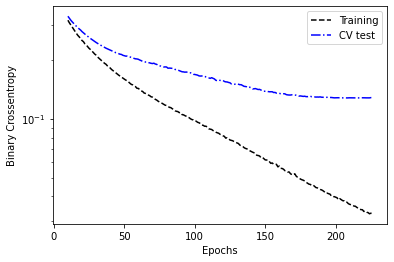

In [497]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plot_learning_curves(hist)

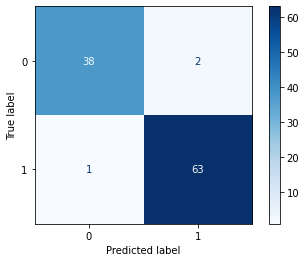

------------------------
Fbeta Score 0.981308411214953
------------------------


In [498]:
dependencies ={
    'StatefullBinaryFBeta' : StatefullBinaryFBeta
}
model_best = keras.models.load_model("my_best_model.h5",custom_objects=dependencies) #to get the model imported with the new statful metric we need the dependencies

evaluate_nnmodel(model,X_test,Y_test,beta_value)

##Using the pca 

The pca didnt improved the standard models. Now let us investigate the impact of pca transformed data on a NN.

In one run i achieved with this network 0.99 accuarcy on the Testdata. But with the next restart is was only 0.97.
Below you can see the best result screenshoted:

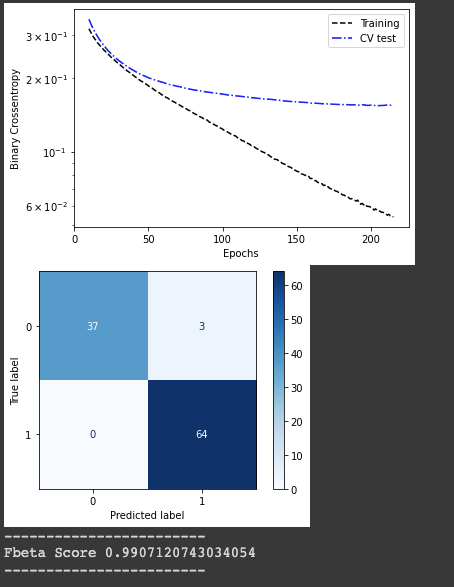

In the conclusion its difficult to say if this pca transformation has an impact on the classification capabilities of the network.

In [499]:
pca = PCA(0.90,random_state=random_state) #settiing the PCA that it should have a variance above 90%

pca.fit(X_train)

pca.n_components_

X_train_pca1 = pca.transform(X_train)
X_test_pca1 = pca.transform(X_test)

PCADf = pd.DataFrame(X_train_pca1)

In [500]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(16, activation= activation_function, input_shape=(X_train_pca1.shape[1],),kernel_initializer=kernel_initializer))
  #model.add(layers.Dropout(0.2))
  model.add(layers.Dense(16, activation= activation_function, input_shape=(X_train_pca1.shape[1],),kernel_initializer=kernel_initializer))
  #model.add(layers.Dropout(0.2))
  model.add(layers.Dense(16, activation= activation_function, input_shape=(X_train_pca1.shape[1],),kernel_initializer=kernel_initializer))
  #model.add(layers.Dropout(0.2))
  #model.add(layers.Dense(16, activation= activation_function, input_shape=(X_train_pca1.shape[1],),kernel_initializer=kernel_initializer))
  #model.add(layers.Dropout(0.2))
  #model.add(layers.Dense(16, activation= activation_function, input_shape=(X_train_pca1.shape[1],),kernel_initializer=kernel_initializer))
  #model.add(layers.Dropout(0.2))
  model.add(layers.Dense(1,activation = last_layer_activation_function,kernel_initializer=kernel_initializer))
  model.compile(optimizer=optimizer, loss=loss_function, metrics=statefull_binary_fbeta)
  return model

In [501]:
myCheckpointpca= keras.callbacks.ModelCheckpoint("my_best_model_pca.h5", save_best_only=True)

build_model().summary()
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),Y_train.ravel()):

  X_train_fold, X_cv_fold = PCADf.iloc[train_index,:], PCADf.iloc[cv_index,:]
  Y_train_fold, y_cv_fold = Y_train.iloc[train_index], Y_train.iloc[cv_index]

  #Building the Keras model:
  model = build_model()

  #Training step: Trains the model in silent mode (verbose = 0)
  history = model.fit(X_train_fold, Y_train_fold, epochs=num_epochs, batch_size=batch_size, validation_data=(X_cv_fold, y_cv_fold) ,verbose=0 ,callbacks = [myEarly_stopping,myCheckpointpca] )

  #Evaluating the training pperformance:
  List_val = model.evaluate(X_train_fold, Y_train_fold, verbose=0)
  print('--------------------------------------------------------')
  print('Training Metrics: ', List_val)

  #Evaluating the CV pperformance:
  List_val = model.evaluate(X_cv_fold, y_cv_fold, verbose=0)
  print('CV Metrics: ', List_val)

list_val_total = model.evaluate(X_train_pca1, Y_train, verbose=0)
print('--------------------------------------------------------')
print('Metrics for the entire training dataset: ', list_val_total)
print('--------------------------------------------------------')

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_178 (Dense)            (None, 16)                208       
_________________________________________________________________
dense_179 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_180 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_181 (Dense)            (None, 1)                 17        
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
--------------------------------------------------------
Training Metrics:  [0.12841397523880005, 0.9696969985961914]
CV Metrics:  [0.2347569465637207, 0.9076175093650818]
--------------------------------------------------------
Training Metrics:  [0.05

**Learning Curve**

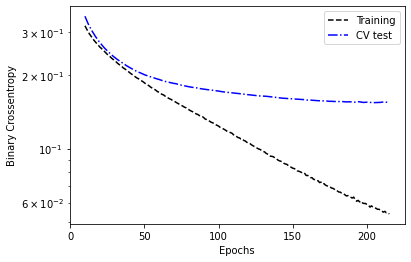

In [502]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plot_learning_curves(hist)

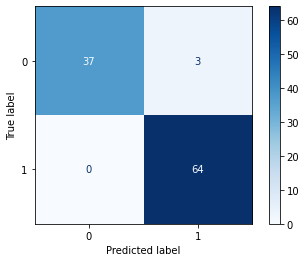

------------------------
Fbeta Score 0.9907120743034054
------------------------


In [503]:
dependencies ={
    'StatefullBinaryFBeta' : StatefullBinaryFBeta
}
model_best = keras.models.load_model("my_best_model_pca.h5",custom_objects=dependencies)

evaluate_nnmodel(model,X_test_pca1,Y_test,beta_value)

# Evaluation of the model predictions

The results of the models from phase 1 are a bit better than the results from the Neuronal Network. The big benefit from the models of the first phase is, that they are not random. They produce in every run the same result. 

In my opinion the Neuronal Network is not suited for this case of dataset. You could get with a lot less effort better and reproducible results with models from the first phase.

Also the models from phase 1 are trained faster than the NN.

Especially for data with medical background it would be benefitial if the decission proccess is comprehensible.  (see graph from Decision Trees)


# Lessons Learnt and Conclusions


If we get back to my inital working Hypothesis:
Build a feasibillty studie with the data if it is possible to correctly classify diabetes with machine Learning with the input of syptoms as features. And which machine learning model delivers the best output with the best score.

The first part is fullfilled. With the help of machine learning models it is possible to detect Diabetes at a early stage with the input of syptoms. We achieved perfect results. It would be interesting if this works also with other diseases or other datsets in the medical area.

In my opinion we will see in the future a lot more digitalisation and data science in the area of healthcare. The doctor won`t be replaced but he could use powerful tool as assistance to detect diseases.

The second part is already answered before. The best model to chose for this problem is a standard model like SVC or RandomForest, they achievd the best scoring.

I think one big lesson that i learned is that Neruonal Networks aren't always the best model. Sometimes you could get better results with standard models.

Another lesson is that it can take a lot of time to try different parameters for the NN.

Furthermore i learned that the world of data science seems infintly big (so many options), and that you can find for every problem, that might occure, a solution in the internet.



#Additional Code

Below i just wanted to share some addional Code.
The first Part is my attempt to program a gridsearch  (layers  Neurons) for the NN.But is was very slow and didnt achieved usable  results.

2nd Part is Adaboost a model from the first phase that i tried but deliverd bad results.


In [504]:
#device_name = tf.test.gpu_device_name()
#if device_name != '/device:GPU:0':
#  raise SystemError('GPU device not found')
#print('Found GPU at: {}'.format(device_name))

In [505]:
"""def build_model(nodes):
  model = models.Sequential()
  model.add(layers.Dense(nodes, activation= activation_function, input_shape=(X_train.shape[1],),kernel_initializer=kernel_initializer))
  model.add(layers.Dense(nodes, activation=activation_function,kernel_initializer=kernel_initializer))
  model.add(layers.Dense(1,activation = last_layer_activation_function,kernel_initializer=kernel_initializer))
  model.compile(optimizer=optimizer, loss=loss_function, metrics=['BinaryAccuracy','FalseNegatives','FalsePositives','Recall','Precision'])
  return model
  """

"def build_model(nodes):\n  model = models.Sequential()\n  model.add(layers.Dense(nodes, activation= activation_function, input_shape=(X_train.shape[1],),kernel_initializer=kernel_initializer))\n  model.add(layers.Dense(nodes, activation=activation_function,kernel_initializer=kernel_initializer))\n  model.add(layers.Dense(1,activation = last_layer_activation_function,kernel_initializer=kernel_initializer))\n  model.compile(optimizer=optimizer, loss=loss_function, metrics=['BinaryAccuracy','FalseNegatives','FalsePositives','Recall','Precision'])\n  return model\n  "

In [506]:
"""
num_epochs = 400
batch_size = 10
"""

'\nnum_epochs = 400\nbatch_size = 10\n'

In [507]:
#with tf.device('/device:GPU:0'):
"""from statistics import mean
binaryloss = []
binaryaccuracy = []
recall =[]
precision = []
averagecvbinary = []
averagecvrecall = []


for nodes in range(2,53,5):
  print(nodes)


  trainingScores = []
  cvScores = []
  cvbinaryaccuarcy = []
  cvrecall = []

  for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),Y_train.ravel()):

    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
    Y_train_fold, y_cv_fold = Y_train.iloc[train_index], Y_train.iloc[cv_index]

    #Building the Keras model:
    model = build_model(nodes)

    #Training step: Trains the model in silent mode (verbose = 0)
    model.fit(X_train_fold, Y_train_fold, epochs=num_epochs, batch_size=batch_size, verbose=0)

    #Evaluating the training pperformance:
    List_val = model.evaluate(X_train_fold, Y_train_fold, verbose=0)

    #Evaluating the CV pperformance:
    List_val = model.evaluate(X_cv_fold, y_cv_fold, verbose=0)
    cvScores.append(List_val)
    cvbinaryaccuarcy.append(List_val[1])
    cvrecall.append(List_val[4])

  averagecvbinary.append(mean(cvbinaryaccuarcy))
  averagecvrecall.append(mean(cvrecall))

  list_val_total = model.evaluate(X_train, Y_train, verbose=0)
  print('--------------------------------------------------------')
  print('Metrics for the entire training dataset: ', list_val_total)
  print('--------------------------------------------------------')

  binaryloss.append(list_val_total[0])
  binaryaccuracy.append(list_val_total[1])
  recall.append(list_val_total[4])
  precision.append(list_val_total[5])

"""

"from statistics import mean\nbinaryloss = []\nbinaryaccuracy = []\nrecall =[]\nprecision = []\naveragecvbinary = []\naveragecvrecall = []\n\n\nfor nodes in range(2,53,5):\n  print(nodes)\n\n\n  trainingScores = []\n  cvScores = []\n  cvbinaryaccuarcy = []\n  cvrecall = []\n\n  for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),Y_train.ravel()):\n\n    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]\n    Y_train_fold, y_cv_fold = Y_train.iloc[train_index], Y_train.iloc[cv_index]\n\n    #Building the Keras model:\n    model = build_model(nodes)\n\n    #Training step: Trains the model in silent mode (verbose = 0)\n    model.fit(X_train_fold, Y_train_fold, epochs=num_epochs, batch_size=batch_size, verbose=0)\n\n    #Evaluating the training pperformance:\n    List_val = model.evaluate(X_train_fold, Y_train_fold, verbose=0)\n\n    #Evaluating the CV pperformance:\n    List_val = model.evaluate(X_cv_fold, y_cv_fold, verbose=0)\n    cvScores.appen

In [508]:
"""
x_axis = list(range(2,53,5))

fig = plt.figure(figsize = [15,17])
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax1 = fig.add_subplot(6, 1, 1)
ax1.plot(x_axis,binaryloss)
plt.title('Binaryloss')
plt.xlabel('Nodes')

ax2 = fig.add_subplot(6, 1, 2)
ax2.plot(x_axis,binaryaccuracy)
plt.title('Binaryaccuarcy')
plt.xlabel('Nodes')

ax3 = fig.add_subplot(6, 1, 3)
ax3.plot(x_axis,recall)
plt.title('Recall')
plt.xlabel('Nodes')

ax3 = fig.add_subplot(6, 1, 4)
ax3.plot(x_axis,precision)
plt.title('Precision')
plt.xlabel('Nodes')

ax5 = fig.add_subplot(6, 1, 5)
ax5.plot(x_axis,averagecvbinary)
plt.title('CV-Binaryaccuarcy')
plt.xlabel('Nodes')

ax6 = fig.add_subplot(6, 1, 6)
ax6.plot(x_axis,averagecvrecall)
plt.title('CV-Recall')
plt.xlabel('Nodes')

plt.savefig('nodes.png')"""

"\nx_axis = list(range(2,53,5))\n\nfig = plt.figure(figsize = [15,17])\nfig.subplots_adjust(hspace=0.4, wspace=0.4)\nax1 = fig.add_subplot(6, 1, 1)\nax1.plot(x_axis,binaryloss)\nplt.title('Binaryloss')\nplt.xlabel('Nodes')\n\nax2 = fig.add_subplot(6, 1, 2)\nax2.plot(x_axis,binaryaccuracy)\nplt.title('Binaryaccuarcy')\nplt.xlabel('Nodes')\n\nax3 = fig.add_subplot(6, 1, 3)\nax3.plot(x_axis,recall)\nplt.title('Recall')\nplt.xlabel('Nodes')\n\nax3 = fig.add_subplot(6, 1, 4)\nax3.plot(x_axis,precision)\nplt.title('Precision')\nplt.xlabel('Nodes')\n\nax5 = fig.add_subplot(6, 1, 5)\nax5.plot(x_axis,averagecvbinary)\nplt.title('CV-Binaryaccuarcy')\nplt.xlabel('Nodes')\n\nax6 = fig.add_subplot(6, 1, 6)\nax6.plot(x_axis,averagecvrecall)\nplt.title('CV-Recall')\nplt.xlabel('Nodes')\n\nplt.savefig('nodes.png')"

In [509]:
"""

import tensorflow as tf
from tensorflow import keras
from keras import optimizers, models, layers, regularizers

def build_model_x(hid_layers):
  model = models.Sequential()
  model.add(layers.Dense(15, activation= activation_function, input_shape=(X_train.shape[1],),kernel_initializer=kernel_initializer))
  for layer in range(hid_layers):
    model.add(layers.Dense(15, activation=activation_function,kernel_initializer=kernel_initializer))
  model.add(layers.Dense(1,activation = last_layer_activation_function,kernel_initializer=kernel_initializer))
  model.compile(optimizer=optimizer, loss=loss_function, metrics=['BinaryAccuracy','FalseNegatives','FalsePositives','Recall','Precision'])
  return model
"""



"\n\nimport tensorflow as tf\nfrom tensorflow import keras\nfrom keras import optimizers, models, layers, regularizers\n\ndef build_model_x(hid_layers):\n  model = models.Sequential()\n  model.add(layers.Dense(15, activation= activation_function, input_shape=(X_train.shape[1],),kernel_initializer=kernel_initializer))\n  for layer in range(hid_layers):\n    model.add(layers.Dense(15, activation=activation_function,kernel_initializer=kernel_initializer))\n  model.add(layers.Dense(1,activation = last_layer_activation_function,kernel_initializer=kernel_initializer))\n  model.compile(optimizer=optimizer, loss=loss_function, metrics=['BinaryAccuracy','FalseNegatives','FalsePositives','Recall','Precision'])\n  return model\n"

In [510]:
"""
from statistics import mean
binaryloss = []
binaryaccuracy = []
recall =[]
precision = []
averagecvbinary = []
averagecvrecall = []


for hid_layers in range(2,33,5):
 


  trainingScores = []
  cvScores = []
  cvbinaryaccuarcy = []
  cvrecall = []

  for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),Y_train.ravel()):

    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
    Y_train_fold, y_cv_fold = Y_train.iloc[train_index], Y_train.iloc[cv_index]

    #Building the Keras model:
    build_model_x(hid_layers).summary()
    model = build_model_x(hid_layers)

    #Training step: Trains the model in silent mode (verbose = 0)
    model.fit(X_train_fold, Y_train_fold, epochs=num_epochs, batch_size=batch_size, verbose=0)

    #Evaluating the training pperformance:
    List_val = model.evaluate(X_train_fold, Y_train_fold, verbose=0)

    #Evaluating the CV pperformance:
    List_val = model.evaluate(X_cv_fold, y_cv_fold, verbose=0)
    cvScores.append(List_val)
    cvbinaryaccuarcy.append(List_val[1])
    cvrecall.append(List_val[4])

  averagecvbinary.append(mean(cvbinaryaccuarcy))
  averagecvrecall.append(mean(cvrecall))

  list_val_total = model.evaluate(X_train, Y_train, verbose=0)
  print('--------------------------------------------------------')
  print('Metrics for the entire training dataset: ', list_val_total)
  print('--------------------------------------------------------')

  binaryloss.append(list_val_total[0])
  binaryaccuracy.append(list_val_total[1])
  recall.append(list_val_total[4])
  precision.append(list_val_total[5])
  """

"\nfrom statistics import mean\nbinaryloss = []\nbinaryaccuracy = []\nrecall =[]\nprecision = []\naveragecvbinary = []\naveragecvrecall = []\n\n\nfor hid_layers in range(2,33,5):\n \n\n\n  trainingScores = []\n  cvScores = []\n  cvbinaryaccuarcy = []\n  cvrecall = []\n\n  for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),Y_train.ravel()):\n\n    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]\n    Y_train_fold, y_cv_fold = Y_train.iloc[train_index], Y_train.iloc[cv_index]\n\n    #Building the Keras model:\n    build_model_x(hid_layers).summary()\n    model = build_model_x(hid_layers)\n\n    #Training step: Trains the model in silent mode (verbose = 0)\n    model.fit(X_train_fold, Y_train_fold, epochs=num_epochs, batch_size=batch_size, verbose=0)\n\n    #Evaluating the training pperformance:\n    List_val = model.evaluate(X_train_fold, Y_train_fold, verbose=0)\n\n    #Evaluating the CV pperformance:\n    List_val = model.evaluate(X_cv_fold,

In [511]:
"""
x_axis = list(range(2,33,5))

fig = plt.figure(figsize = [15,17])
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax1 = fig.add_subplot(6, 1, 1)
ax1.plot(x_axis,binaryloss)
plt.title('Binaryloss')
plt.xlabel('Layers')

ax2 = fig.add_subplot(6, 1, 2)
ax2.plot(x_axis,binaryaccuracy)
plt.title('Binaryaccuarcy')
plt.xlabel('Layers')

ax3 = fig.add_subplot(6, 1, 3)
ax3.plot(x_axis,recall)
plt.title('Recall')
plt.xlabel('Layers')

ax3 = fig.add_subplot(6, 1, 4)
ax3.plot(x_axis,precision)
plt.title('Precision')
plt.xlabel('Layers')

ax5 = fig.add_subplot(6, 1, 5)
ax5.plot(x_axis,averagecvbinary)
plt.title('CV-Binaryaccuarcy')
plt.xlabel('Layers')

ax6 = fig.add_subplot(6, 1, 6)
ax6.plot(x_axis,averagecvrecall)
plt.title('CV-Recall')
plt.xlabel('Layers')

plt.savefig('layers.png')
"""

"\nx_axis = list(range(2,33,5))\n\nfig = plt.figure(figsize = [15,17])\nfig.subplots_adjust(hspace=0.4, wspace=0.4)\nax1 = fig.add_subplot(6, 1, 1)\nax1.plot(x_axis,binaryloss)\nplt.title('Binaryloss')\nplt.xlabel('Layers')\n\nax2 = fig.add_subplot(6, 1, 2)\nax2.plot(x_axis,binaryaccuracy)\nplt.title('Binaryaccuarcy')\nplt.xlabel('Layers')\n\nax3 = fig.add_subplot(6, 1, 3)\nax3.plot(x_axis,recall)\nplt.title('Recall')\nplt.xlabel('Layers')\n\nax3 = fig.add_subplot(6, 1, 4)\nax3.plot(x_axis,precision)\nplt.title('Precision')\nplt.xlabel('Layers')\n\nax5 = fig.add_subplot(6, 1, 5)\nax5.plot(x_axis,averagecvbinary)\nplt.title('CV-Binaryaccuarcy')\nplt.xlabel('Layers')\n\nax6 = fig.add_subplot(6, 1, 6)\nax6.plot(x_axis,averagecvrecall)\nplt.title('CV-Recall')\nplt.xlabel('Layers')\n\nplt.savefig('layers.png')\n"

##Adaboost

In [512]:
"""from sklearn.ensemble import AdaBoostClassifier #binary classifier Adaboost
kernel = 'rbf'
C = 10
svc = SVC(kernel= kernel, gamma=gamma, tol=tol, C=C,  shrinking=shrinking, probability = True)
model = svc

Ada = AdaBoostClassifier(n_estimators=50, random_state=2021, base_estimator = svc  ) 

model = Ada
"""

"from sklearn.ensemble import AdaBoostClassifier #binary classifier Adaboost\nkernel = 'rbf'\nC = 10\nsvc = SVC(kernel= kernel, gamma=gamma, tol=tol, C=C,  shrinking=shrinking, probability = True)\nmodel = svc\n\nAda = AdaBoostClassifier(n_estimators=50, random_state=2021, base_estimator = svc  ) \n\nmodel = Ada\n"

In [513]:
"""
trainingScores = []
cvScores = []

#generating indices for the k-fold split to select training and test data:
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),Y_train.ravel()):

  X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
  Y_train_fold, y_cv_fold = Y_train.iloc[train_index], Y_train.iloc[cv_index]

  #Fitting the model to the data:
  model.fit(X_train_fold, Y_train_fold)
  
  #getting scores from Training data:
  scoreTraining = model.score(X_train_fold, Y_train_fold)
  trainingScores.append(scoreTraining)

  #getting scores from k-fold test data:
  scoreCV = model.score(X_cv_fold, y_cv_fold)
  cvScores.append(scoreCV)

  #printing the results:
  print('Training Score: ', scoreTraining)
  print('CV Score: ', scoreCV)
  
#prinitng total score
scoreAda = model.score(X_train,Y_train)
print('-----------------------------------')
print('Adaboost Classification Score: ', scoreAda)
print('-----------------------------------')
"""

"\ntrainingScores = []\ncvScores = []\n\n#generating indices for the k-fold split to select training and test data:\nfor train_index, cv_index in k_fold.split(np.zeros(len(X_train)),Y_train.ravel()):\n\n  X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]\n  Y_train_fold, y_cv_fold = Y_train.iloc[train_index], Y_train.iloc[cv_index]\n\n  #Fitting the model to the data:\n  model.fit(X_train_fold, Y_train_fold)\n  \n  #getting scores from Training data:\n  scoreTraining = model.score(X_train_fold, Y_train_fold)\n  trainingScores.append(scoreTraining)\n\n  #getting scores from k-fold test data:\n  scoreCV = model.score(X_cv_fold, y_cv_fold)\n  cvScores.append(scoreCV)\n\n  #printing the results:\n  print('Training Score: ', scoreTraining)\n  print('CV Score: ', scoreCV)\n  \n#prinitng total score\nscoreAda = model.score(X_train,Y_train)\nprint('-----------------------------------')\nprint('Adaboost Classification Score: ', scoreAda)\nprint('-------------------